In [1]:
import pandas as pd
import sqlite3
import chess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from nlpChess.utils.MovePlotter import MovePlotter

# Automatically reload modules when they change
%load_ext autoreload
%autoreload 2

In [2]:
from nlpChess.utils.DatasetLoader import loadConcatenatedDataset, loadConcatenatedShakespeareDataset
ds = loadConcatenatedDataset()
df = ds.to_pandas()

dsShakeSpeare = loadConcatenatedShakespeareDataset()
dfShakeSpeare = dsShakeSpeare.to_pandas()

In [3]:
moves = df['Moves']
lines = dfShakeSpeare['PlayerLine']

In [4]:
from gensim.models.word2vec import Word2Vec

# Shakespeare

In [5]:
tokenized_sentences = [s.lower().split() for s in lines]
tokenized_sentences[:10]

[['how', 'now,', 'varrius!'],
 ['ay,', 'if', 'i', 'ever', 'saw', 'him', 'before', 'and', 'knew', 'him.'],
 ['with', 'the', 'same', "'havior", 'that', 'your', 'passion', 'bears'],
 ['may', 'be,', 'he', 'hears', 'the', 'king'],
 ['nay,', 'come,', 'again.'],
 ['nor', 'in', 'a', 'way', 'so', 'chaste,', 'since', 'my', 'desires'],
 ['my', 'lord,'],
 ['fie', 'on', 'sinful', 'fantasy!'],
 ['i', 'warrant', 'thee.'],
 ['of', 'ill-shaped', 'fishes,', 'and', 'about', 'his', 'shelves']]

In [6]:
from nlpChess.models import Word2VecShakespear

TRAIN_WORD_TO_VEC = False
if TRAIN_WORD_TO_VEC:
    modelShakespear = Word2Vec(tokenized_sentences, vector_size=100, window=100, sg=1)
else:
    modelShakespear = Word2VecShakespear
wordVectorsShakespear = modelShakespear.wv.vectors
wordVectorsShakespear.shape

(11414, 100)

In [7]:
import numpy as np
#Print the  shakespear model dictionary
dictionary = np.array(modelShakespear.wv.index_to_key)
vectorsShakespear = modelShakespear.wv.vectors
print(f'Vectors shape: {vectorsShakespear.shape}')
vectorsNormalized = vectorsShakespear / np.linalg.norm(vectorsShakespear, axis=1, keepdims=True)
vectorsNormalized

Vectors shape: (11414, 100)


array([[ 0.10635589,  0.15597203, -0.05912231, ..., -0.19565624,
         0.00730353,  0.04026533],
       [-0.04538647,  0.11594764,  0.08312722, ..., -0.15397072,
        -0.08709324, -0.01133449],
       [ 0.07146836, -0.09750339, -0.00900965, ..., -0.11364552,
         0.12896767, -0.15751371],
       ...,
       [-0.00656141,  0.06679944,  0.00905039, ..., -0.14370058,
         0.01986485, -0.05516728],
       [ 0.00399126,  0.11898547,  0.03250217, ..., -0.14615463,
         0.06248165, -0.01589272],
       [ 0.01091508,  0.1194936 ,  0.04761395, ..., -0.20616864,
         0.01581972, -0.02250259]], dtype=float32)

(2000, 2000)


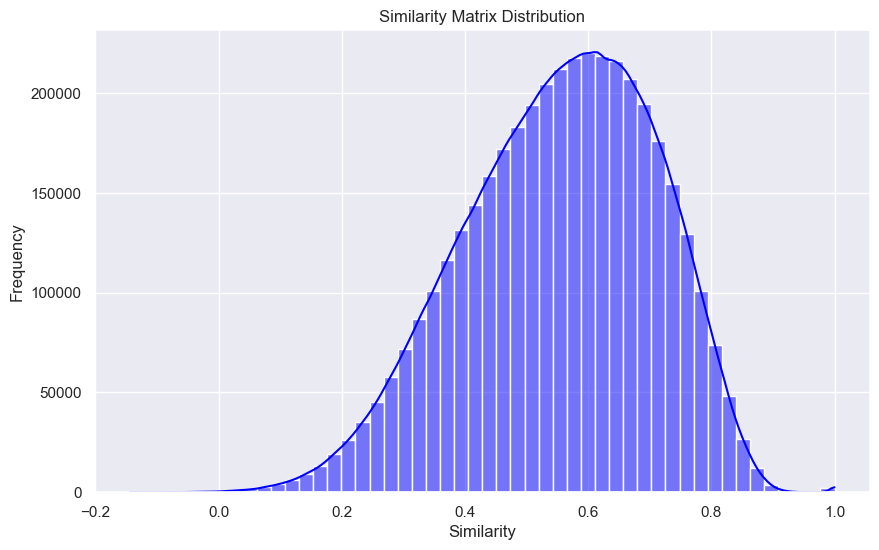

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#Compute the similarity matrix
vectorsShakespearSelections = vectorsShakespear / np.linalg.norm(vectorsShakespear, axis=1, keepdims=True)
similarityMatrixShakespear = vectorsShakespearSelections[:2000] @ vectorsShakespearSelections[:2000].T
print(similarityMatrixShakespear.shape)

#plot the similarity matrix distribution using sns
plt.figure(figsize=(10, 6))
plt.title('Similarity Matrix Distribution')
sns.histplot(similarityMatrixShakespear.flatten(), bins=50, kde=True, color='blue')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

In [9]:
#Print the model dictionary
dictionatyShakespear = np.array(modelShakespear.wv.index_to_key)
vectorsShakespear = modelShakespear.wv.vectors
print(f'Vectors shape: {vectorsShakespear.shape}')
vectorsShakespearNormalized = vectorsShakespear / np.linalg.norm(vectorsShakespear, axis=1, keepdims=True)


Vectors shape: (11414, 100)


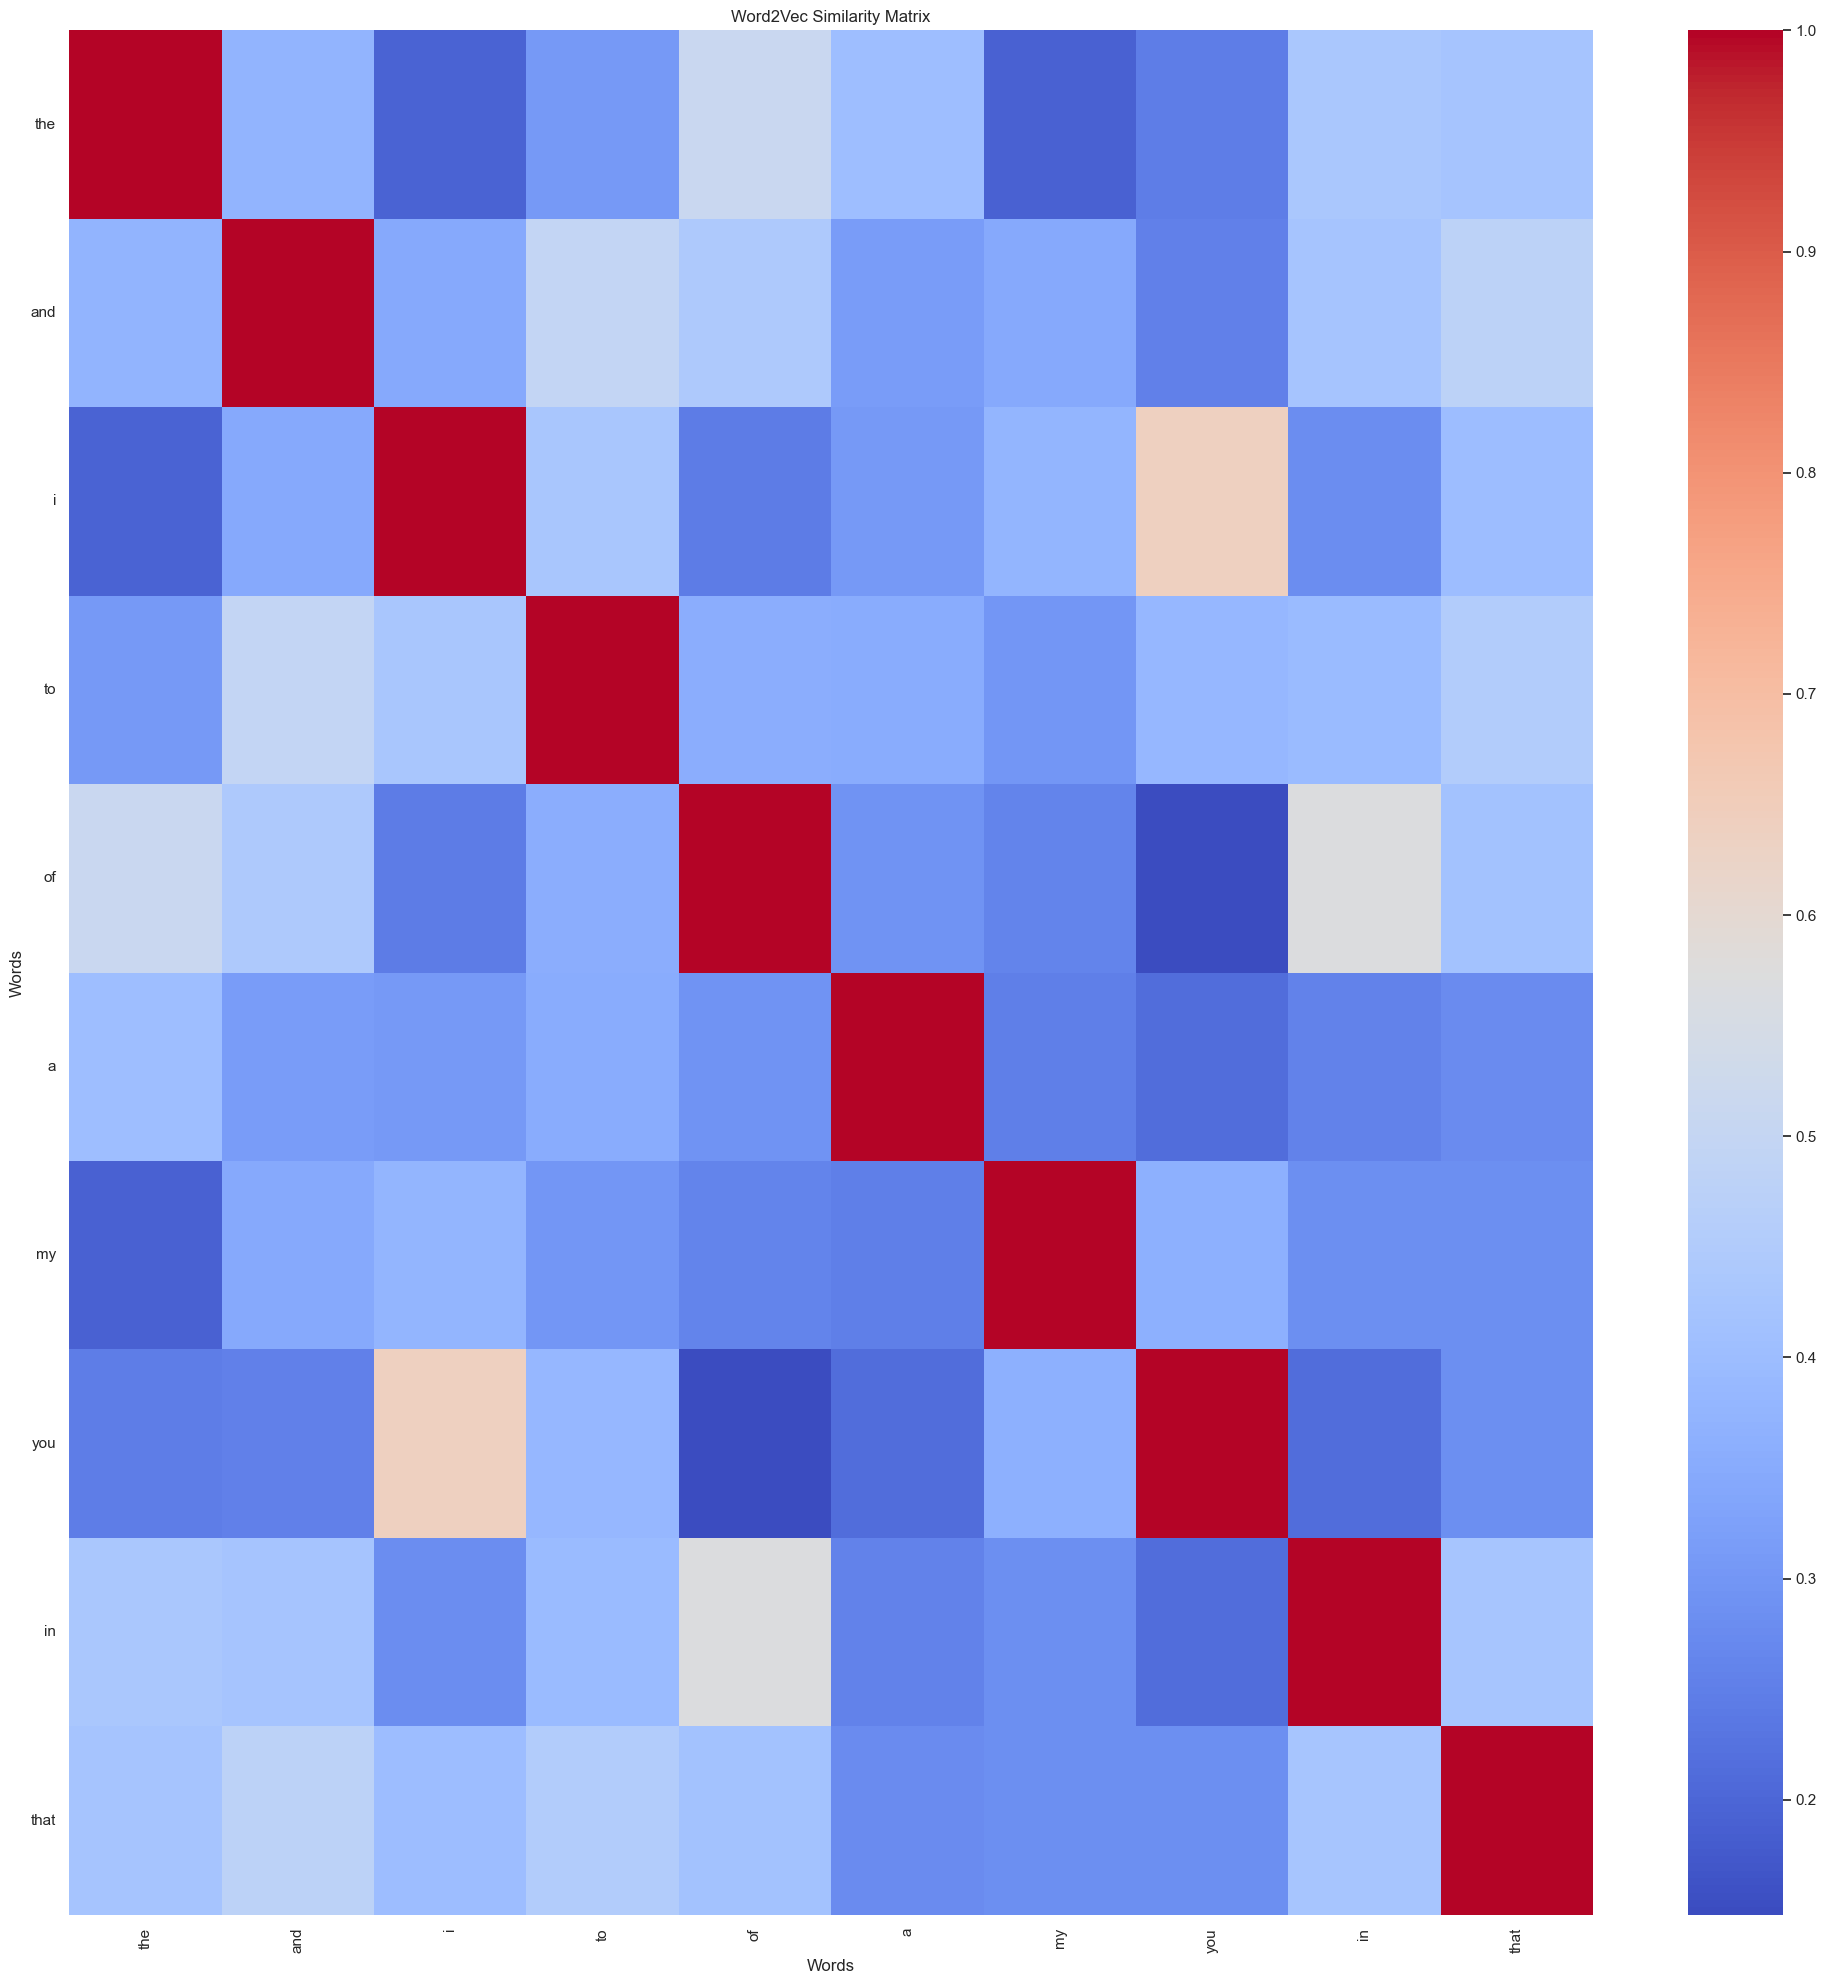

In [10]:
# Plot the similarity matrix using seaborn
nVectorsShakespear = 10
plt.figure(figsize=(20, 20))
sns.heatmap(similarityMatrixShakespear[:nVectorsShakespear, :nVectorsShakespear], xticklabels=dictionatyShakespear[:nVectorsShakespear],
            yticklabels=dictionatyShakespear[:nVectorsShakespear], cmap='coolwarm')
plt.title('Word2Vec Similarity Matrix')
plt.xlabel('Words')
plt.ylabel('Words')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

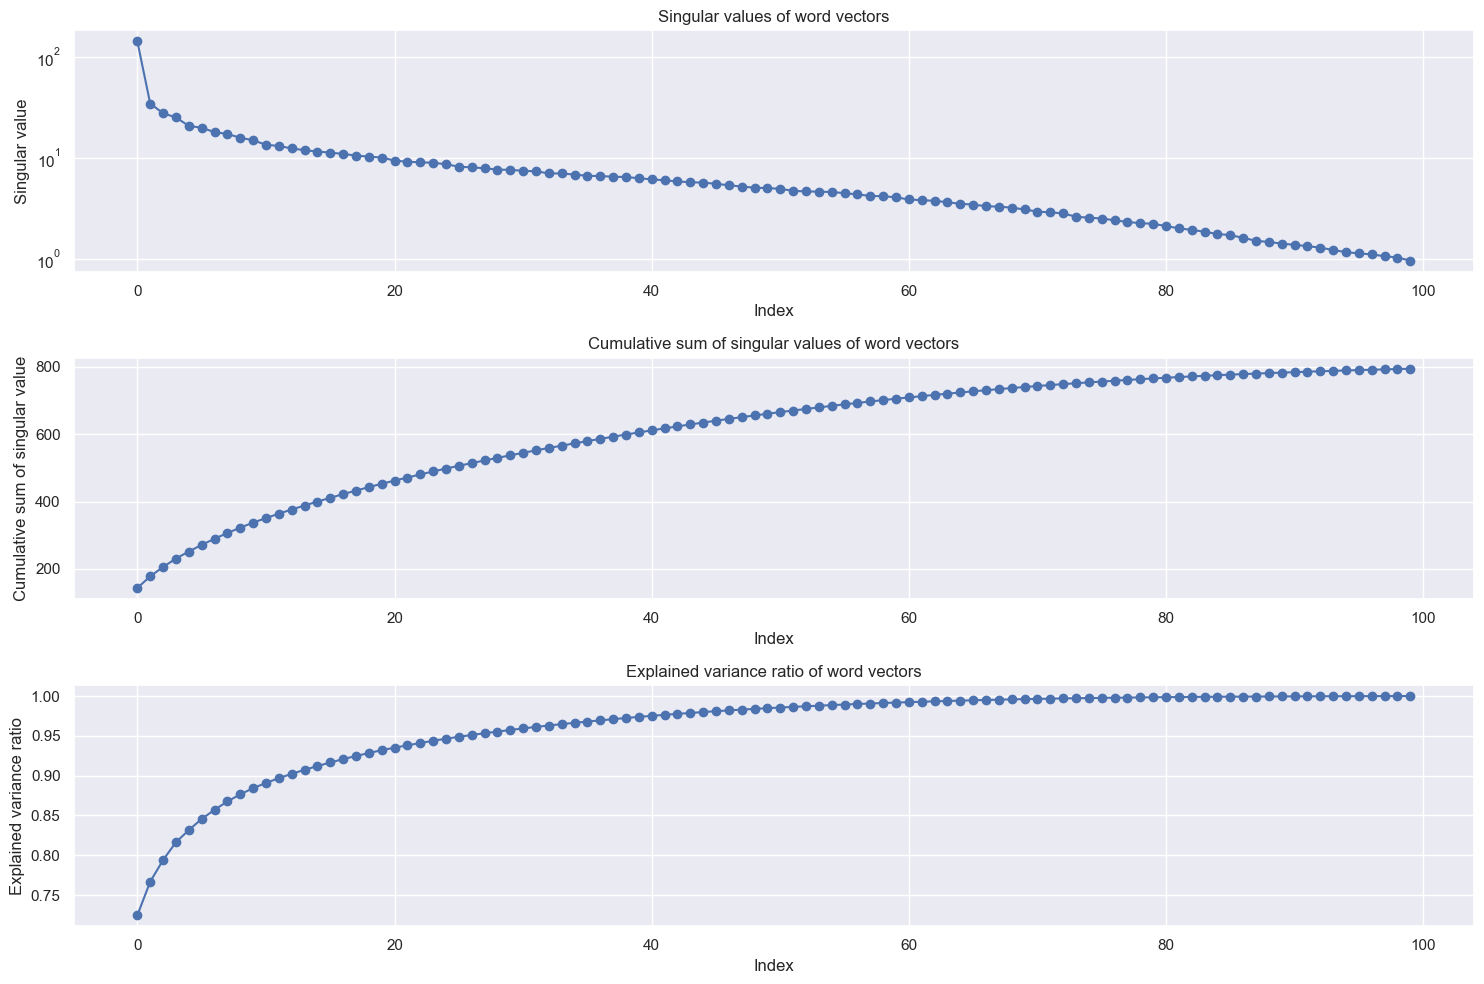

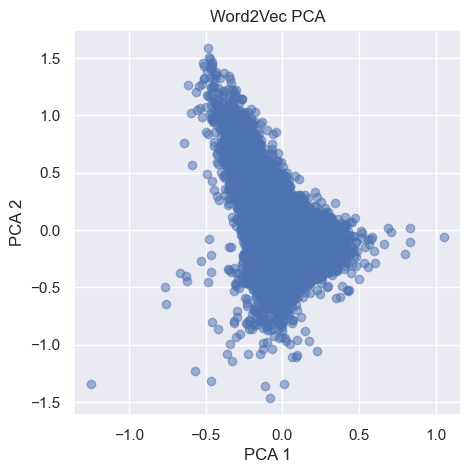

In [11]:
#PCA over the word vectors
wordVectorsCenteredShakespear = wordVectorsShakespear - np.mean(wordVectorsShakespear, axis=0)
U, s, Vt = np.linalg.svd(wordVectorsShakespear, full_matrices=False)
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the singular values
axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular values of word vectors')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Singular value')

# Plot the cumulative sum of the singular values
axes[1].plot(np.cumsum(s), 'o-')
axes[1].set_title('Cumulative sum of singular values of word vectors')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Cumulative sum of singular value')

# Plot the explained variance ratio
axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained variance ratio of word vectors')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Explained variance ratio')

# Adjust layout
plt.tight_layout()

plt.show()


wordVectorsShakespearPCA = np.dot(wordVectorsCenteredShakespear, Vt.T)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsShakespearPCA[:, 0], wordVectorsShakespearPCA[:, 1], alpha=0.5)
plt.title('Word2Vec PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

c:\Polimi\Master\2Sem\NLP-Project\.conda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP(angular_rp_forest=True, metric='cosine', verbose=1)
Sun May 25 01:56:22 2025 Construct fuzzy simplicial set
Sun May 25 01:56:22 2025 Finding Nearest Neighbors
Sun May 25 01:56:22 2025 Building RP forest with 10 trees
Sun May 25 01:56:28 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Sun May 25 01:56:40 2025 Finished Nearest Neighbor Search
Sun May 25 01:56:43 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun May 25 01:56:49 2025 Finished embedding


C:\Users\Paolo\AppData\Local\Temp\ipykernel_21508\3714550432.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis', s=1)


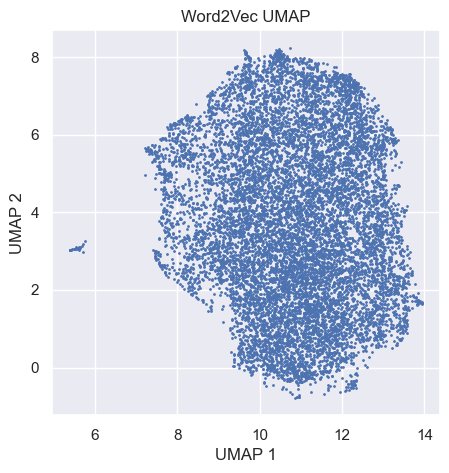

In [12]:
#umap projection
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', verbose=1)
embedding = reducer.fit_transform(wordVectorsShakespear)
plt.figure(figsize=(5, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis', s=1)
plt.title('Word2Vec UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [13]:
np.where(dictionatyShakespear == 'king')[0][0], np.where(dictionatyShakespear == 'queen')[0][0], \
    np.where(dictionatyShakespear == 'prince')[0][0], np.where(dictionatyShakespear == 'princess')[0][0] 

(129, 396, 393, 2095)

In [14]:
king = modelShakespear.wv['king']
prince = modelShakespear.wv['prince']
princess = modelShakespear.wv['princess']

result = king + (princess - prince)
print(f"Most similar to \"king\":")
print(modelShakespear.wv.similar_by_vector('king', topn=10))
print(f"Most similar to \"king + (princess - prince)\":")
print(modelShakespear.wv.similar_by_vector(result, topn=10))

Most similar to "king":
[('edward', 0.842998206615448), ('richard', 0.8233780860900879), ('prince', 0.80342698097229), ('duke', 0.79555344581604), ('henry', 0.7806119918823242), ('queen', 0.7749432921409607), ('york', 0.7721909880638123), ('king,', 0.7706081867218018), ('england,', 0.7628750205039978), ('lancaster,', 0.7418131828308105)]
Most similar to "king + (princess - prince)":
[('king', 0.8455015420913696), ('henry', 0.7373426556587219), ('queen', 0.706891655921936), ('fifth,', 0.7045981287956238), ('france', 0.7006511092185974), ('princess', 0.6994293928146362), ("crown'd", 0.6971282362937927), ('heir', 0.6953607201576233), ('whereof', 0.6932643055915833), ('arthur', 0.6907383799552917)]


# Chess

In [15]:
from nlpChess.models import Word2VecChess
TRAIN_WORD_TO_VEC = False
if TRAIN_WORD_TO_VEC:
    model = Word2Vec(moves, vector_size=100, window=100, sg=1, min_count=1, workers=8)
else:
    model = Word2VecChess
wordVectors = model.wv.vectors
vectorsNormalized = wordVectors / np.linalg.norm(wordVectors, axis=1, keepdims=True)
dictionaty = np.array(model.wv.index_to_key)
wordVectors.shape

(1912, 100)

In [ ]:
from nlpChess.utils.ChessMoveVisualizer import ChessMoveVisualizer
ChessMoveVisualizer(model, board_size=350, n_similar_moves=10)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01^\x00\x00\x01^\x08\x06\x00\x00\x00\xcd+w\x1a\x00\…

Text(value='', description='Move:', placeholder='e.g., e2e4')

Button(description='Make Move', style=ButtonStyle())

Output()

In [17]:
model.wv.most_similar('a2a3', topn=10)

[('f2f3', 0.7943048477172852),
 ('a7a5', 0.791117787361145),
 ('a3a4', 0.7886144518852234),
 ('g2g3', 0.788270115852356),
 ('h2h4', 0.7774356603622437),
 ('b2b4', 0.774601936340332),
 ('h2h3', 0.7667534351348877),
 ('f7f5', 0.7453738451004028),
 ('c2c4', 0.7427295446395874),
 ('a1c1', 0.7384577393531799)]

In [18]:
startingLetter = [ord(move[3]) for move in dictionaty]
print(startingLetter[:10])

[52, 51, 54, 54, 56, 54, 51, 49, 51, 52]


(1912, 1912)


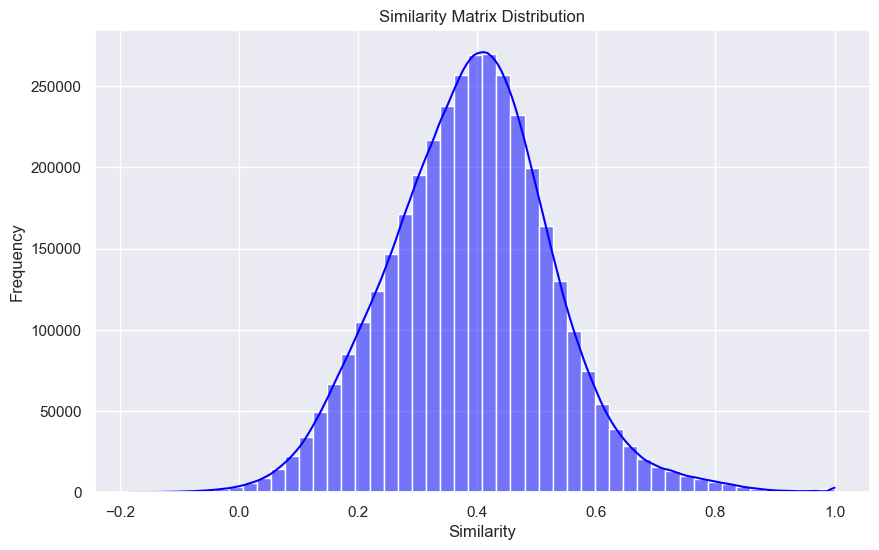

In [19]:
#Compute the similarity matrix
vectorsSelections = vectorsNormalized
dictionatySelections = dictionaty
similarityMatrix = vectorsSelections @ vectorsSelections.T
print(similarityMatrix.shape)

#plot the similarity matrix distribution using sns
plt.figure(figsize=(10, 6))
plt.title('Similarity Matrix Distribution')
sns.histplot(similarityMatrix.flatten(), bins=50, kde=True, color='blue')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

['d2d4', 'g1f3', 'g8f6', 'g7g6', 'e8g8', 'e7e6', 'b1c3', 'e1g1', 'g2g3', 'e2e4']
['d4d2', 'f3g1', 'f6g8', 'g6g7', 'g8e8', 'e6e7', 'c3b1', 'g1e1', 'g3g2', 'e4e2']
(1912, 100) (1912, 100)


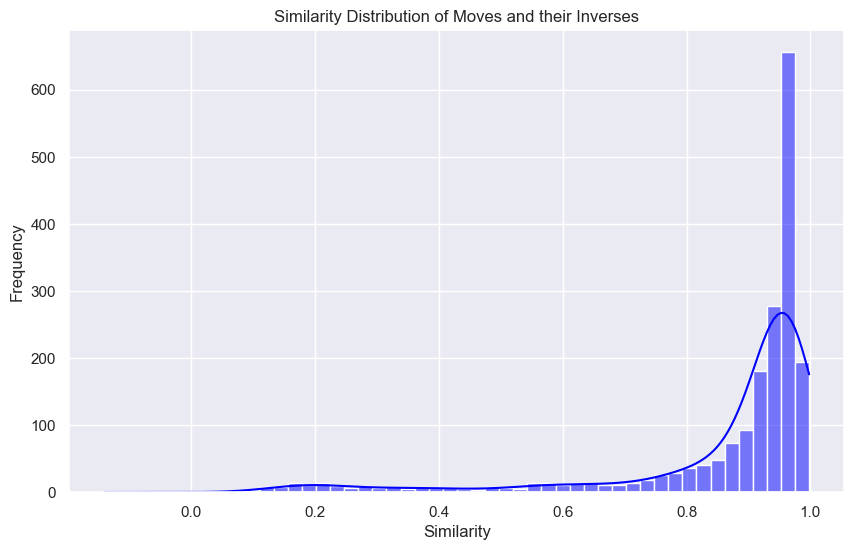

In [20]:
#Look at the similarity between a move and it's inverse
def capAt5Chars(move):
    if len(move) > 5:
        return move[:5]
    return move

def getInverseMove(move):
    return move[2:4] + move[:2]

# Get all the words in the model's vocabulary
words = dictionaty
wordsCapped = [capAt5Chars(word) for word in words]
print(wordsCapped[:10])
wordsCappedEmbeddings = model.wv[wordsCapped]
wordsInverse = [getInverseMove(word) for word in wordsCapped]
print(wordsInverse[:10])
wordsInverseEmbeddinds = model.wv[wordsInverse]

wordsCappedEmbeddings = wordsCappedEmbeddings / np.linalg.norm(wordsCappedEmbeddings, axis=1, keepdims=True)
wordsInverseEmbeddinds = wordsInverseEmbeddinds / np.linalg.norm(wordsInverseEmbeddinds, axis=1, keepdims=True)

print(wordsCappedEmbeddings.shape, wordsInverseEmbeddinds.shape)
similarityInverse = wordsCappedEmbeddings @ wordsInverseEmbeddinds.T
# Take only the elements on the diagonal (similarity between each move and its inverse)
similarityInverse = np.diag(similarityInverse)

#Plot similarity distribution
plt.figure(figsize=(10, 6))
plt.title('Similarity Distribution of Moves and their Inverses')
sns.histplot(similarityInverse.flatten(), bins=50, kde=True, color='blue')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

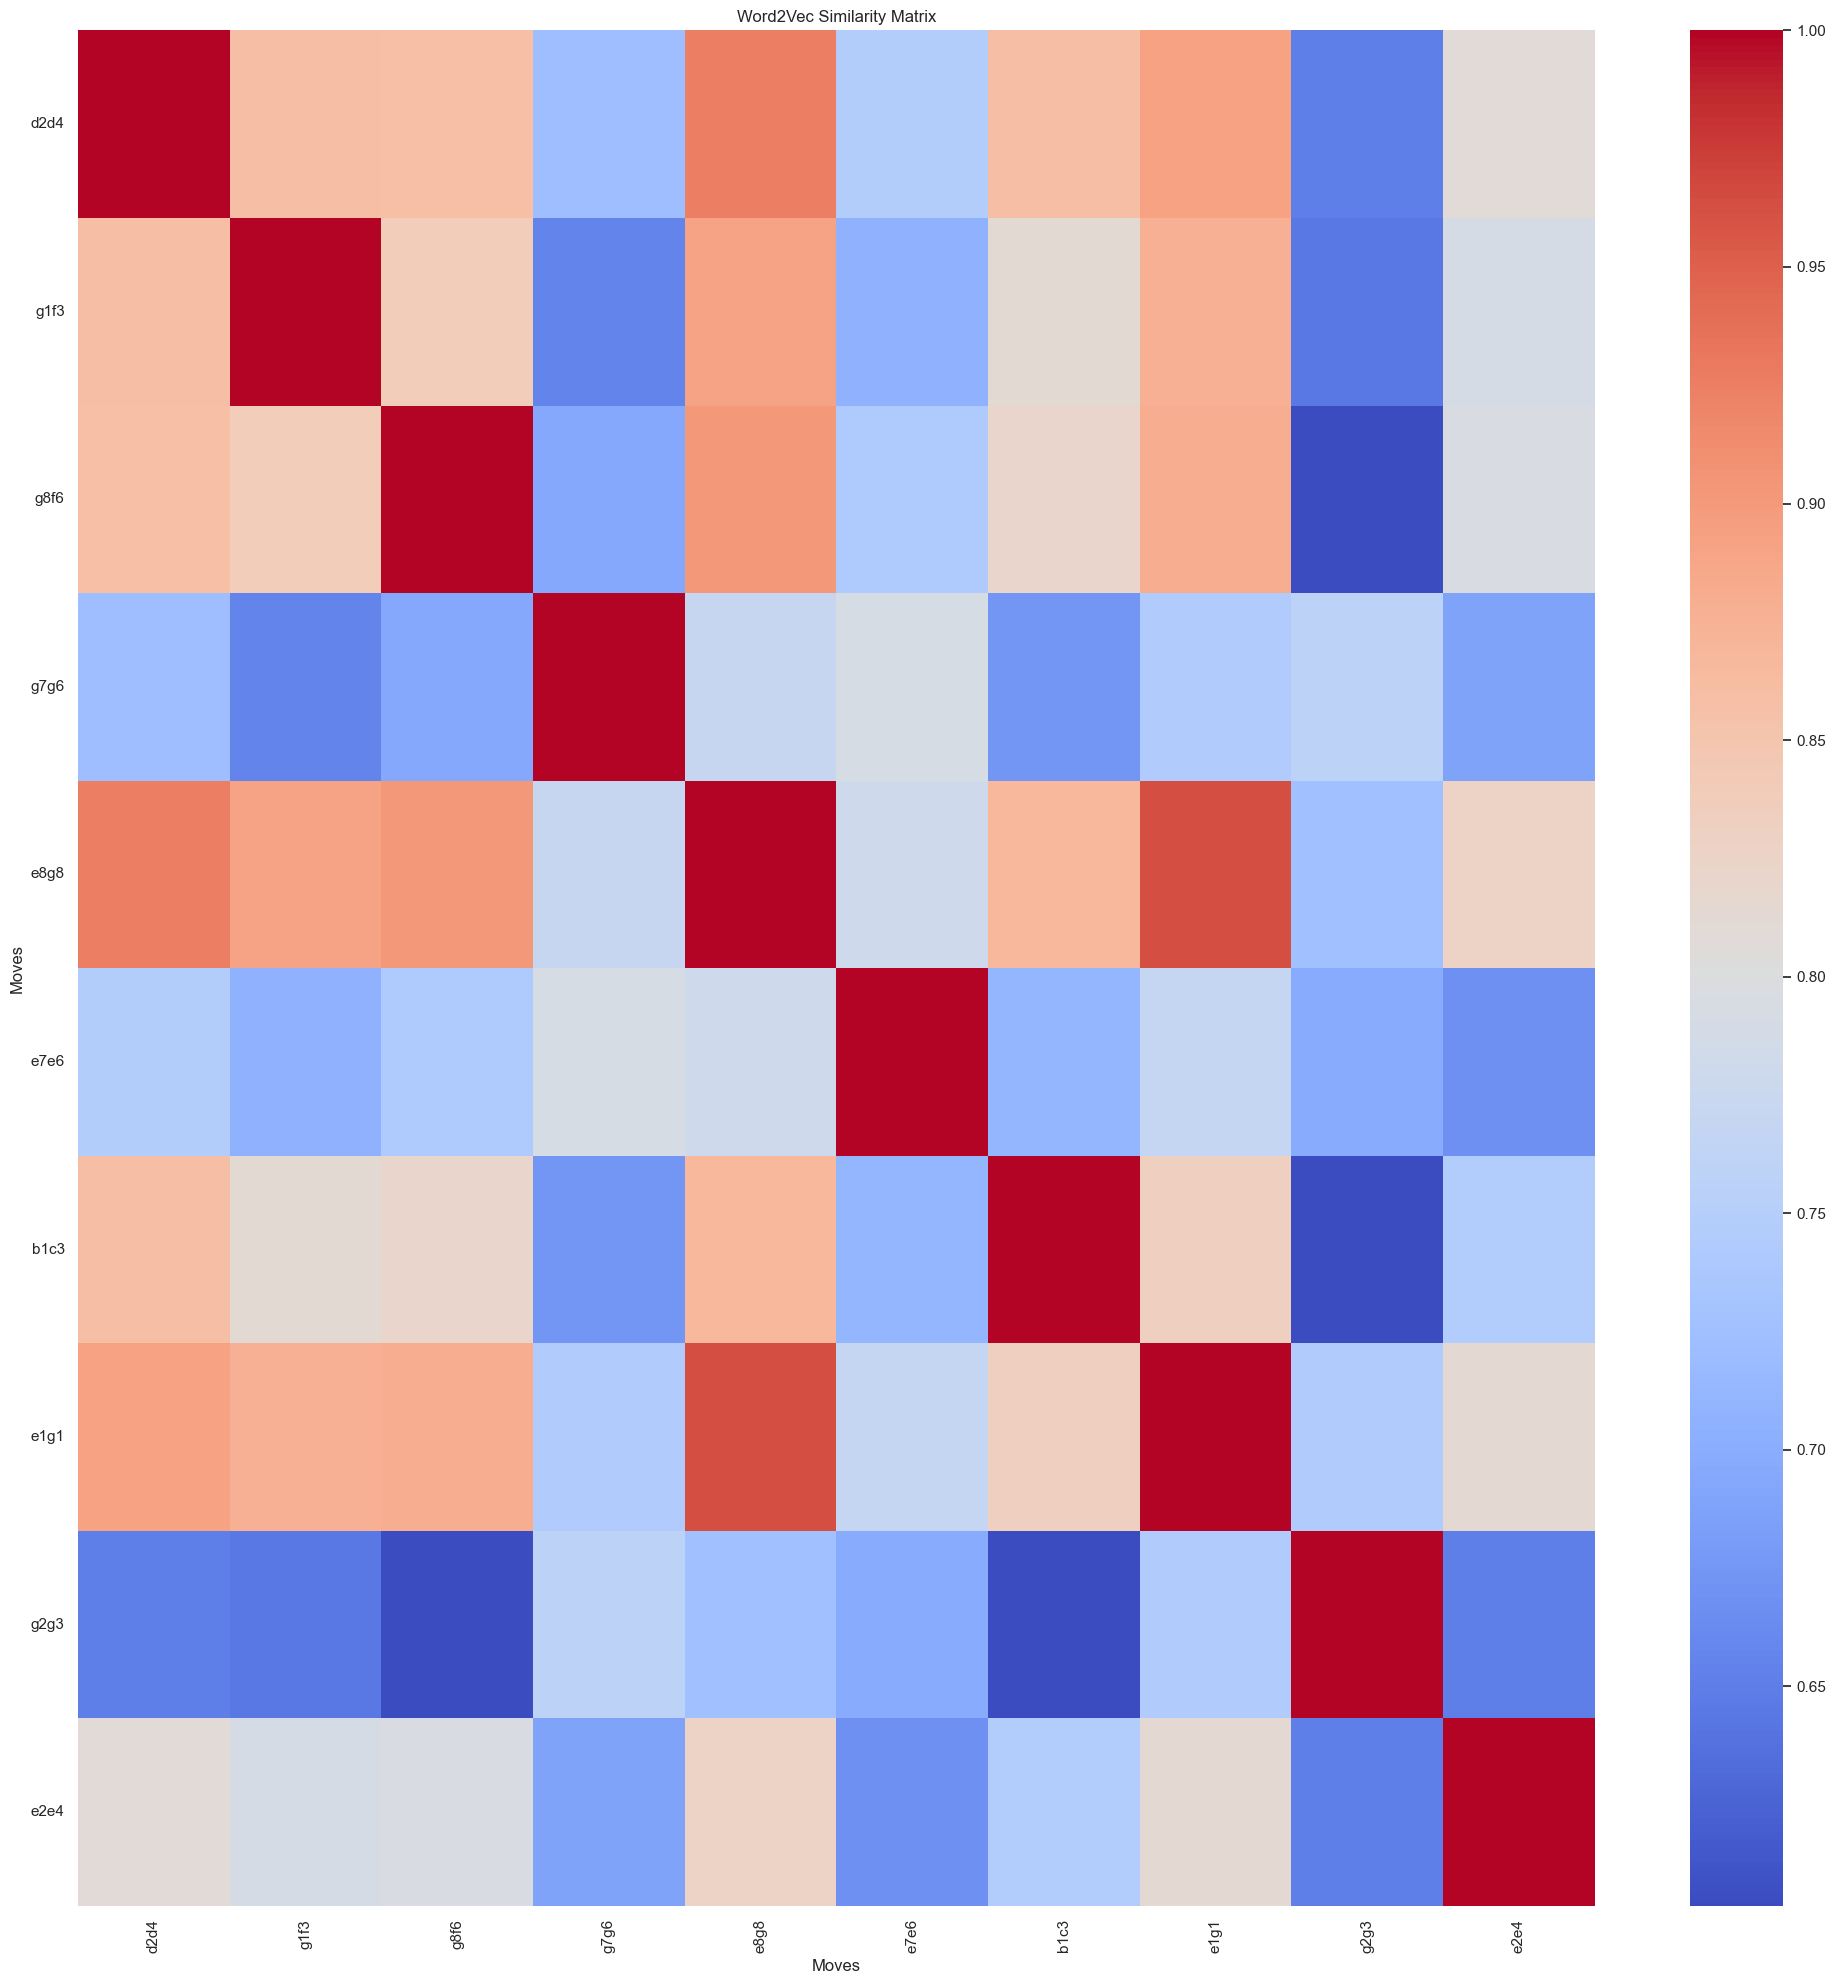

In [21]:
# Plot the similarity matrix using seaborn
nVectors = 10
plt.figure(figsize=(20, 20))
sns.heatmap(similarityMatrix[:nVectors, :nVectors], xticklabels=dictionatySelections[:nVectors],
            yticklabels=dictionatySelections[:nVectors], cmap='coolwarm')
plt.title('Word2Vec Similarity Matrix')
plt.xlabel('Moves')
plt.ylabel('Moves')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
from collections import Counter

firstHalves = [move[:2] for move in dictionaty]
firstHalvesCounter = dict(Counter(firstHalves))
firstHalvesIdx = [firstHalvesCounter[m] for m in firstHalves]

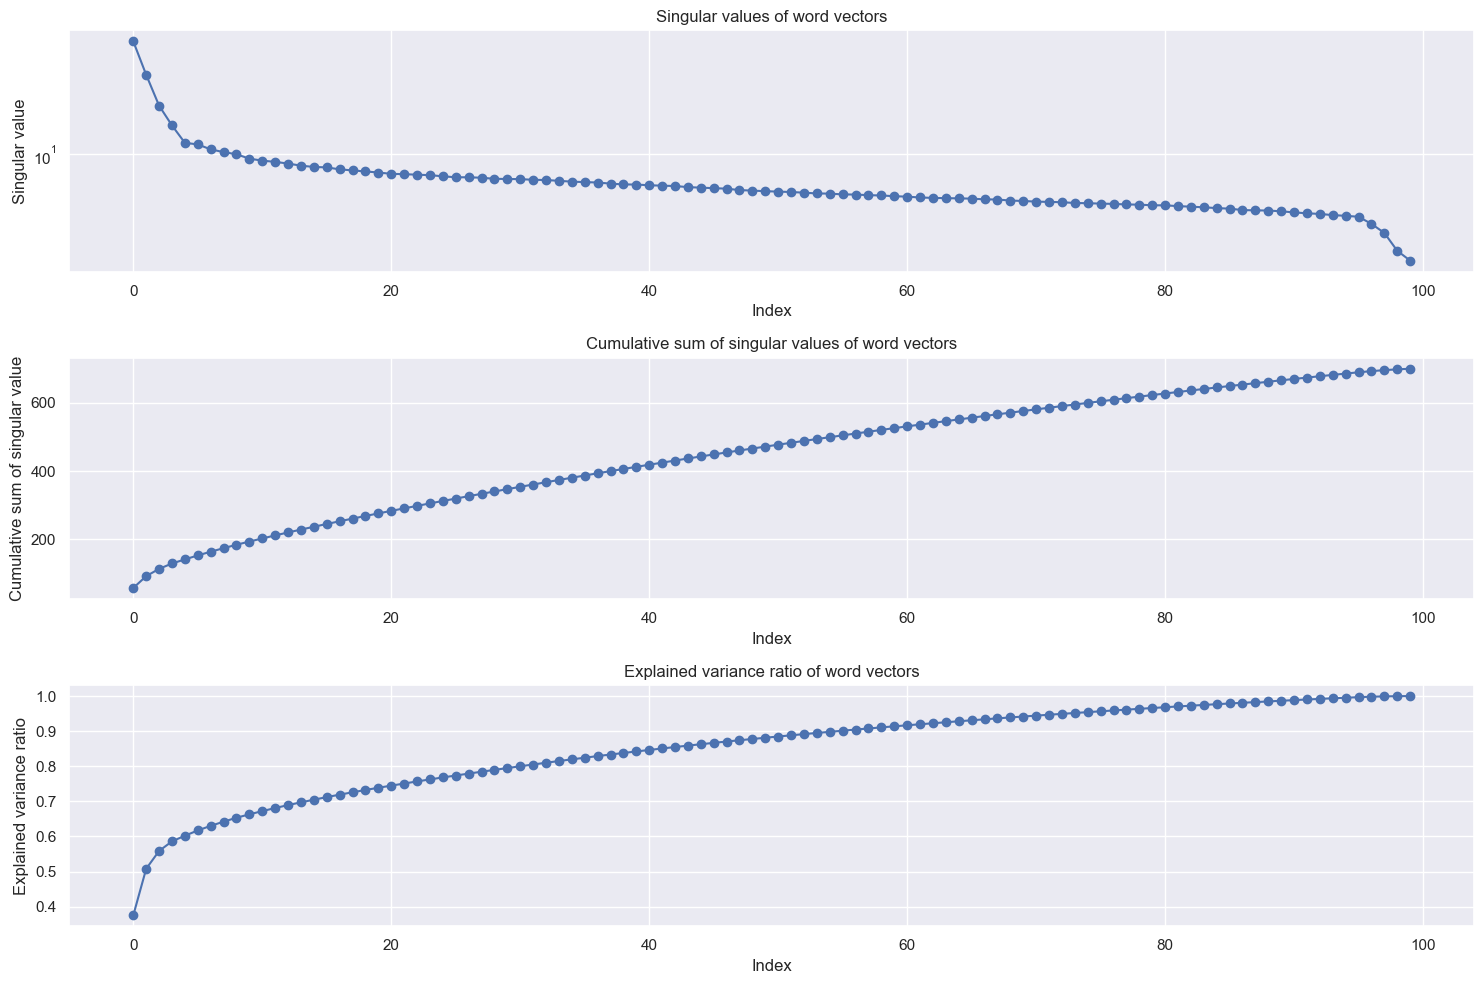

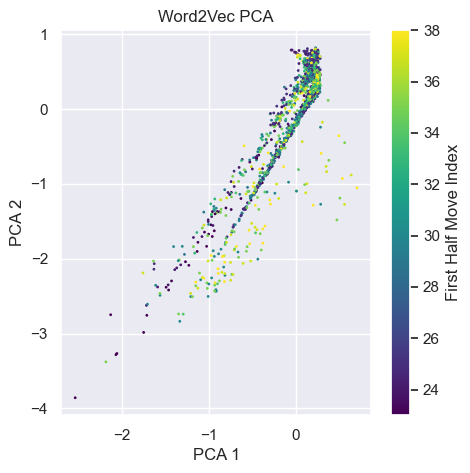

In [23]:
#PCA over the word vectors
wordVectorsCentered = wordVectors - np.mean(wordVectors, axis=0)
U, s, Vt = np.linalg.svd(wordVectors, full_matrices=False)
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the singular values
axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular values of word vectors')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Singular value')

# Plot the cumulative sum of the singular values
axes[1].plot(np.cumsum(s), 'o-')
axes[1].set_title('Cumulative sum of singular values of word vectors')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Cumulative sum of singular value')

# Plot the explained variance ratio
axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained variance ratio of word vectors')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Explained variance ratio')

# Adjust layout
plt.tight_layout()

plt.show()


wordVectorsPCA = np.dot(wordVectorsCentered, Vt.T)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsPCA[:, 0], wordVectorsPCA[:, 1], s=1, c = firstHalvesIdx, cmap='viridis')
plt.title('Word2Vec PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='First Half Move Index')
plt.show()


c:\Polimi\Master\2Sem\NLP-Project\.conda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


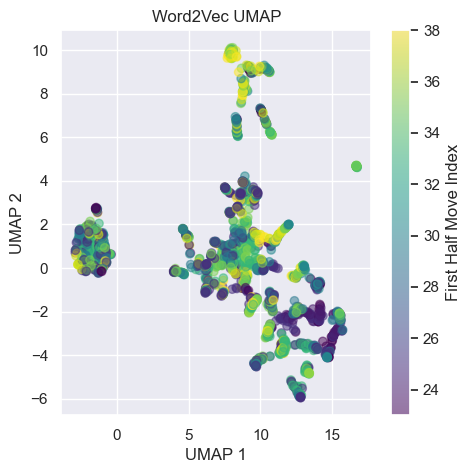

In [24]:
#umap projection
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding = reducer.fit_transform(wordVectors)
plt.figure(figsize=(5, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, c=firstHalvesIdx, cmap='viridis')
plt.title('Word2Vec UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='First Half Move Index')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1912 samples in 0.001s...
[t-SNE] Computed neighbors for 1912 samples in 1.850s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1912
[t-SNE] Computed conditional probabilities for sample 1912 / 1912
[t-SNE] Mean sigma: 0.669860
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.919006
[t-SNE] KL divergence after 1000 iterations: 1.050035


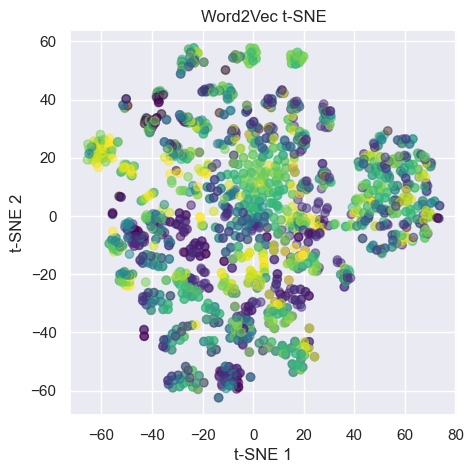

In [25]:
# tsne over the word vectors
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, verbose=1)

wordVectorsTSNE = tsne.fit_transform(wordVectors)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], alpha=0.5, c=firstHalvesIdx, cmap='viridis')
plt.title('Word2Vec t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

For n_clusters = 2, the silhouette score is: 0.1436
For n_clusters = 3, the silhouette score is: 0.0819
For n_clusters = 4, the silhouette score is: 0.0711
For n_clusters = 5, the silhouette score is: 0.0763
For n_clusters = 6, the silhouette score is: 0.0804
For n_clusters = 7, the silhouette score is: 0.0482
For n_clusters = 8, the silhouette score is: 0.0590
For n_clusters = 9, the silhouette score is: 0.0613
For n_clusters = 10, the silhouette score is: 0.0500
For n_clusters = 11, the silhouette score is: 0.0529
For n_clusters = 12, the silhouette score is: 0.0535
For n_clusters = 13, the silhouette score is: 0.0485
For n_clusters = 14, the silhouette score is: 0.0528
For n_clusters = 15, the silhouette score is: 0.0505
For n_clusters = 16, the silhouette score is: 0.0533
For n_clusters = 17, the silhouette score is: 0.0551
For n_clusters = 18, the silhouette score is: 0.0520
For n_clusters = 19, the silhouette score is: 0.0540
For n_clusters = 20, the silhouette score is: 0.0555
F

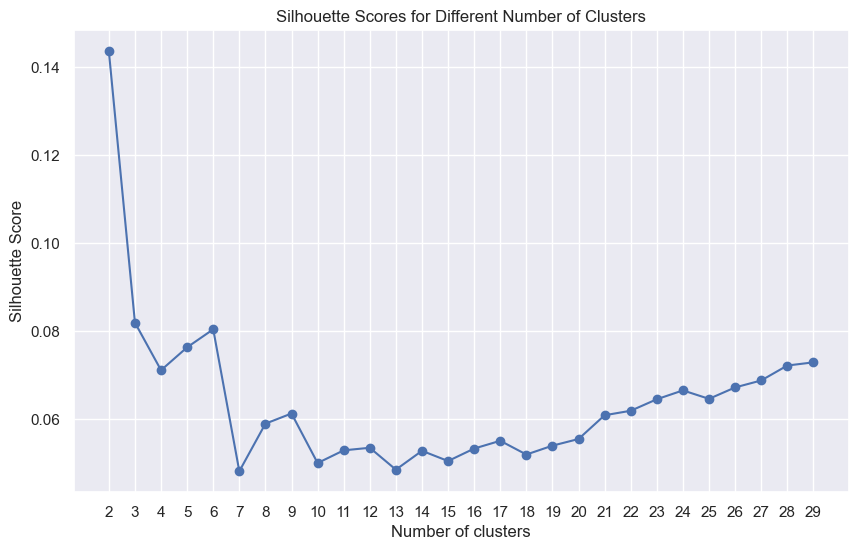

Best number of clusters: 8
Number of clusters: 8


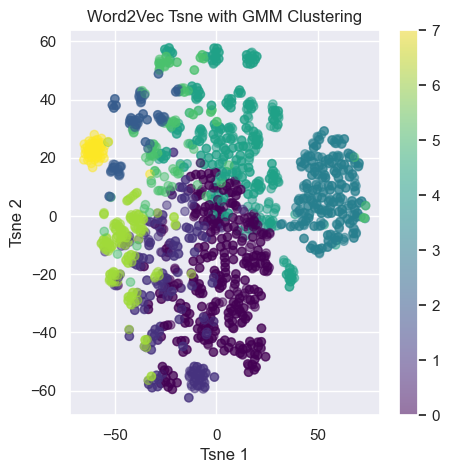

In [26]:
#Perform gaussian mixture model clustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Apply the elbow method to find the optimal number of clusters using silhouette scores
silhouette_scores = []
range_n_clusters = range(2, 30)
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    cluster_labels = gmm.fit_predict(wordVectors)
    silhouette_avg = silhouette_score(wordVectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Find the optimal number of clusters
best_n_clusters = 8
print(f"Best number of clusters: {best_n_clusters}")

# Fit the GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=best_n_clusters, random_state=0)
gmm.fit(wordVectors)
clusters = gmm.predict(wordVectors)
#Print the number of clusters
print(f'Number of clusters: {len(np.unique(clusters))}')
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec Tsne with GMM Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

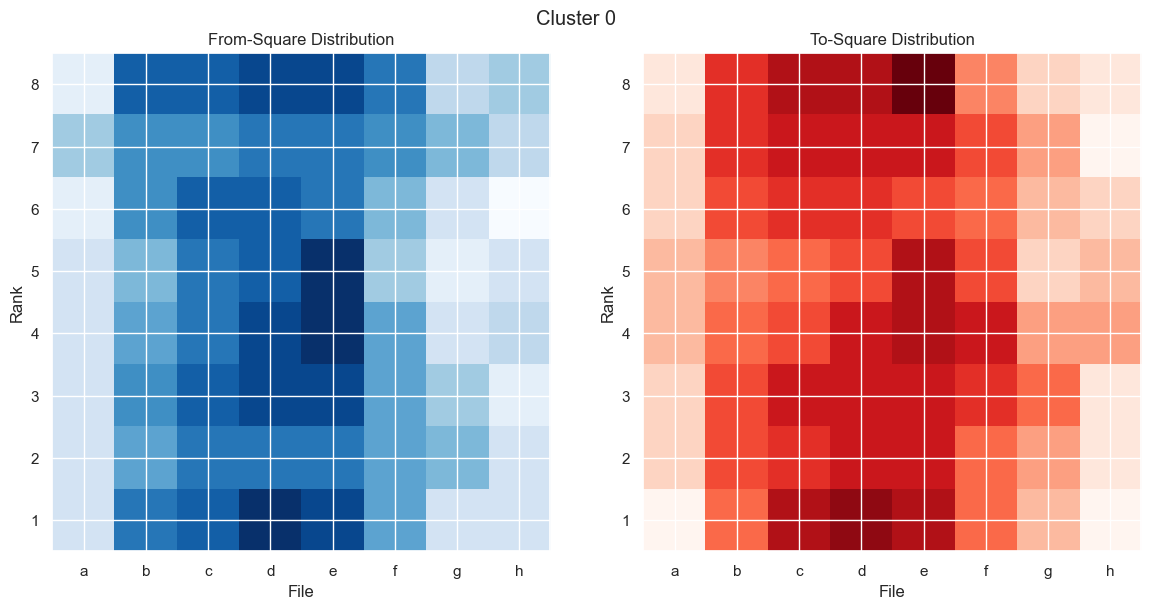

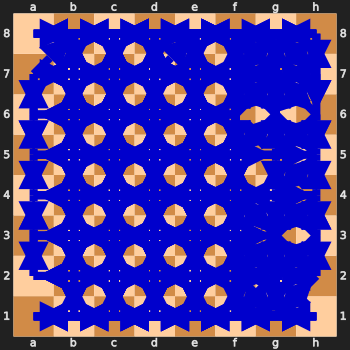

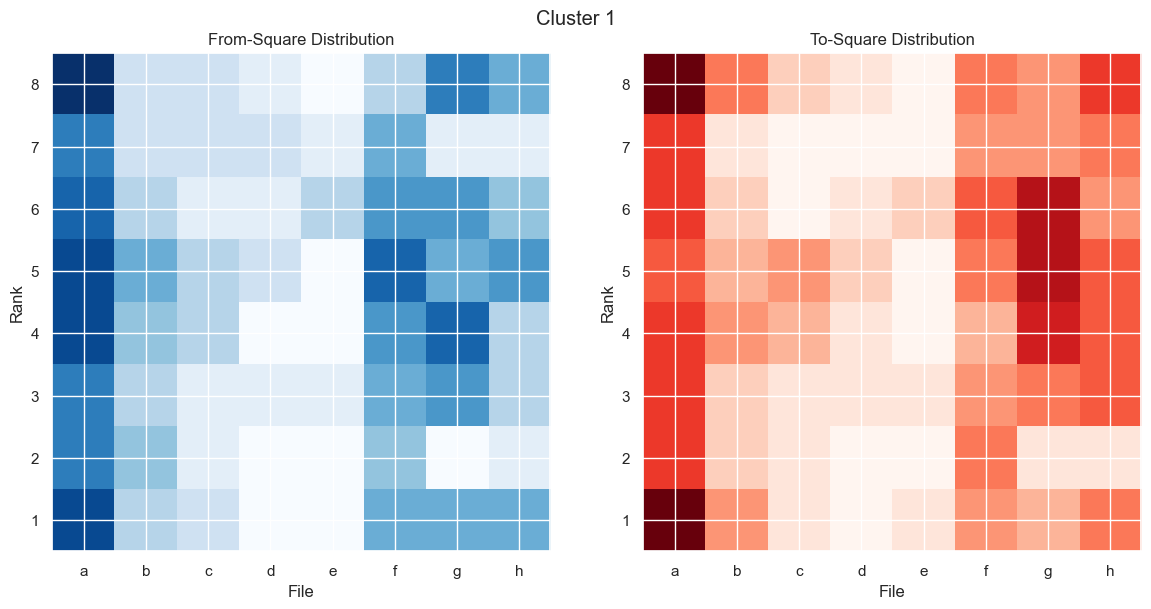

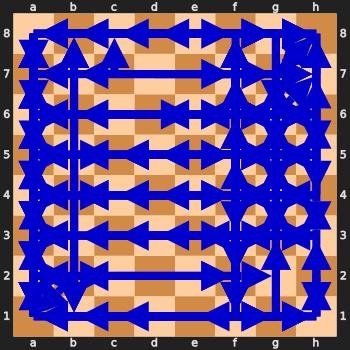

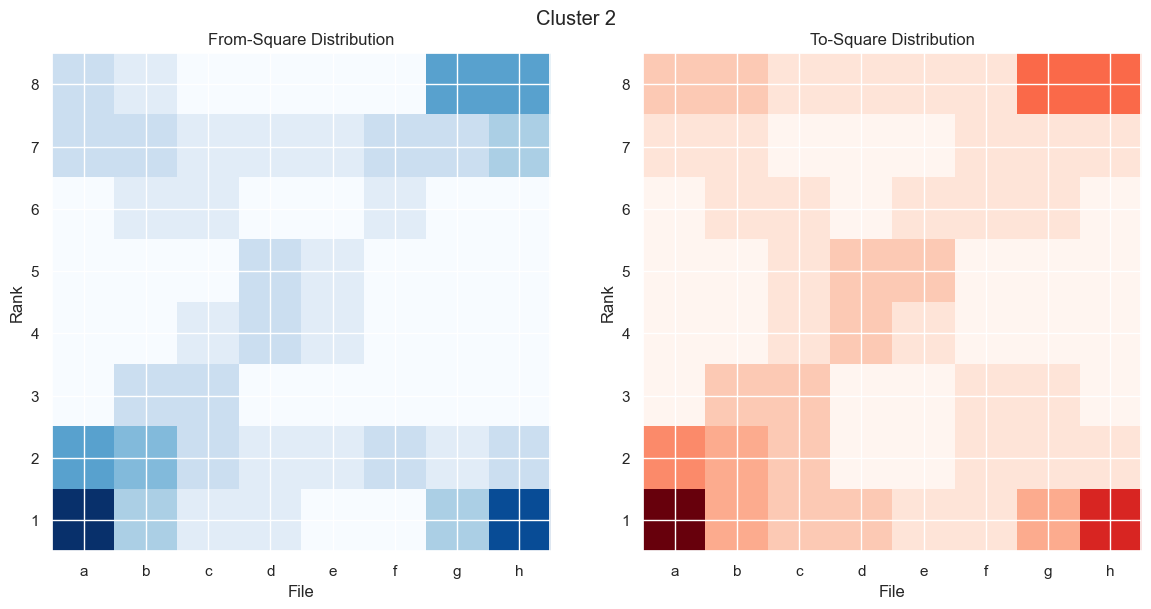

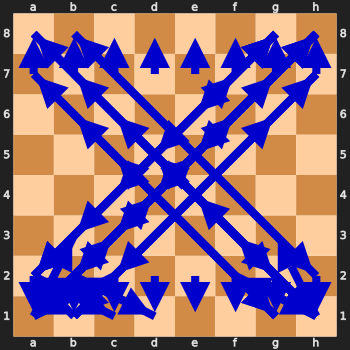

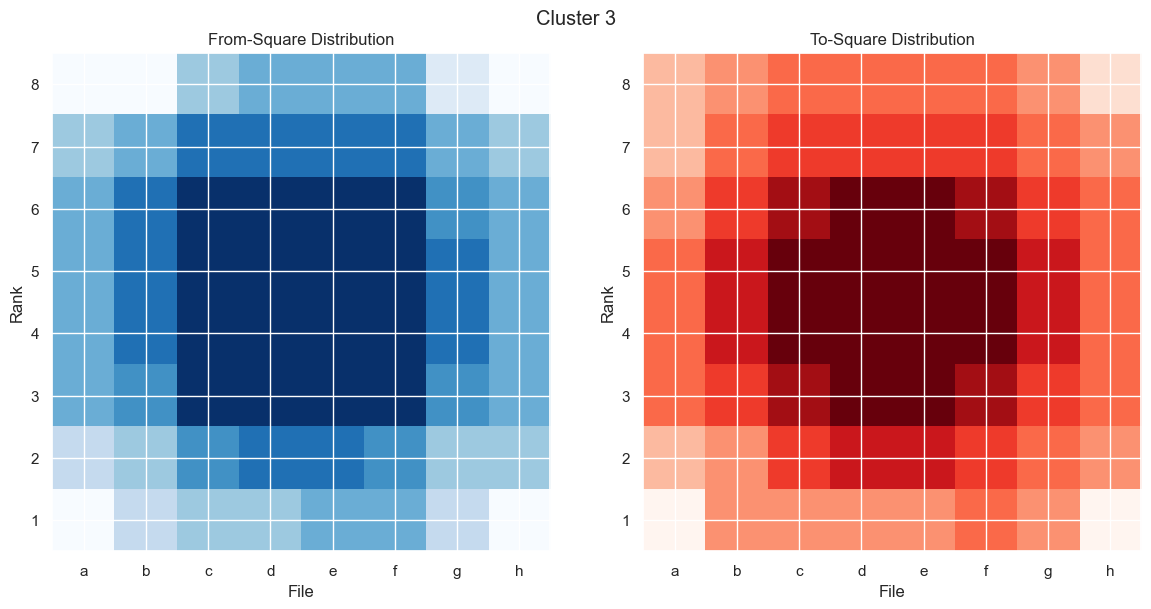

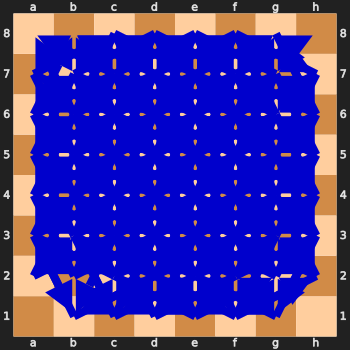

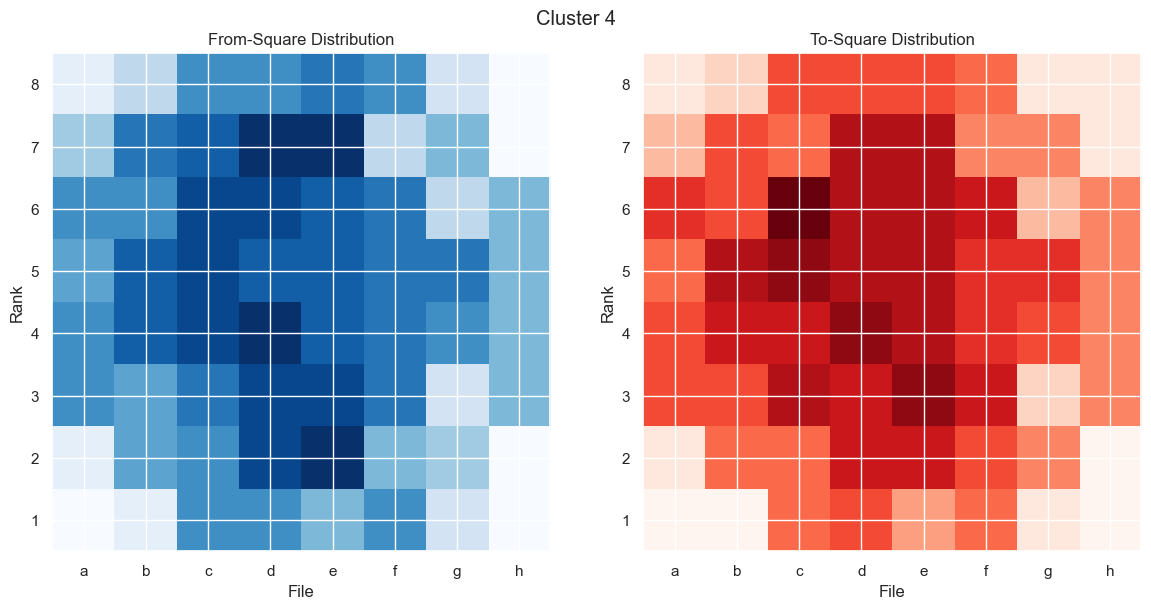

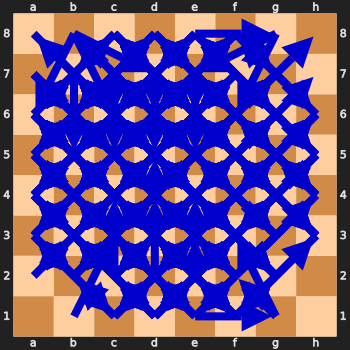

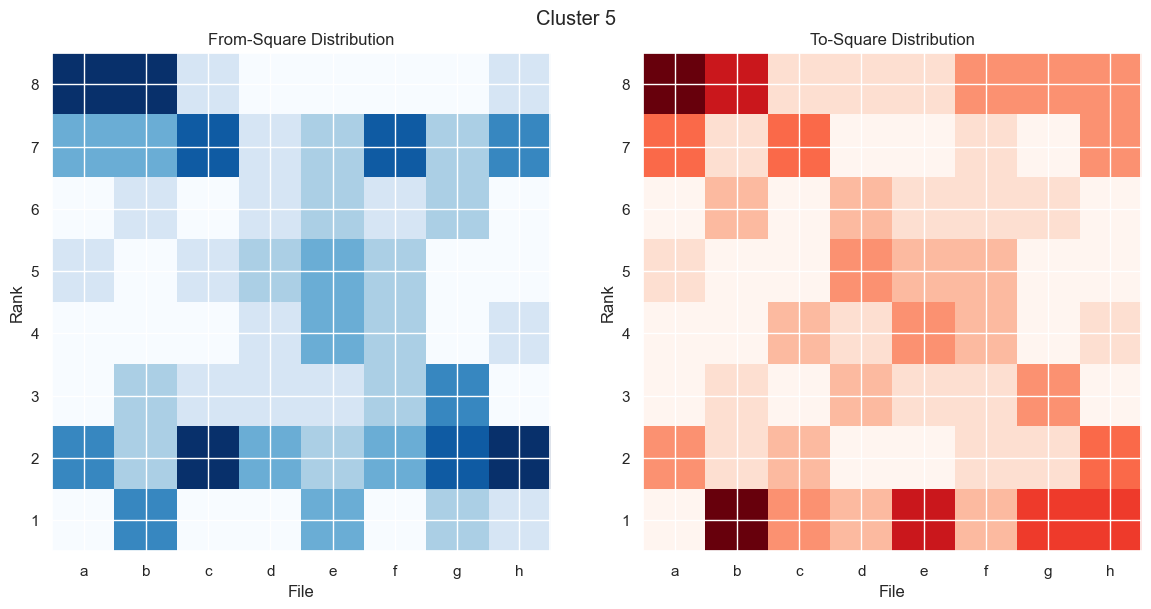

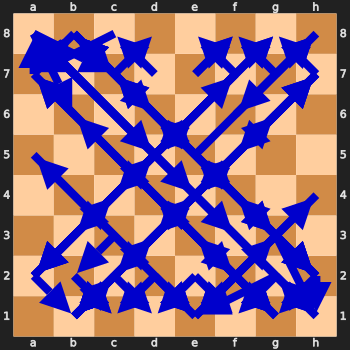

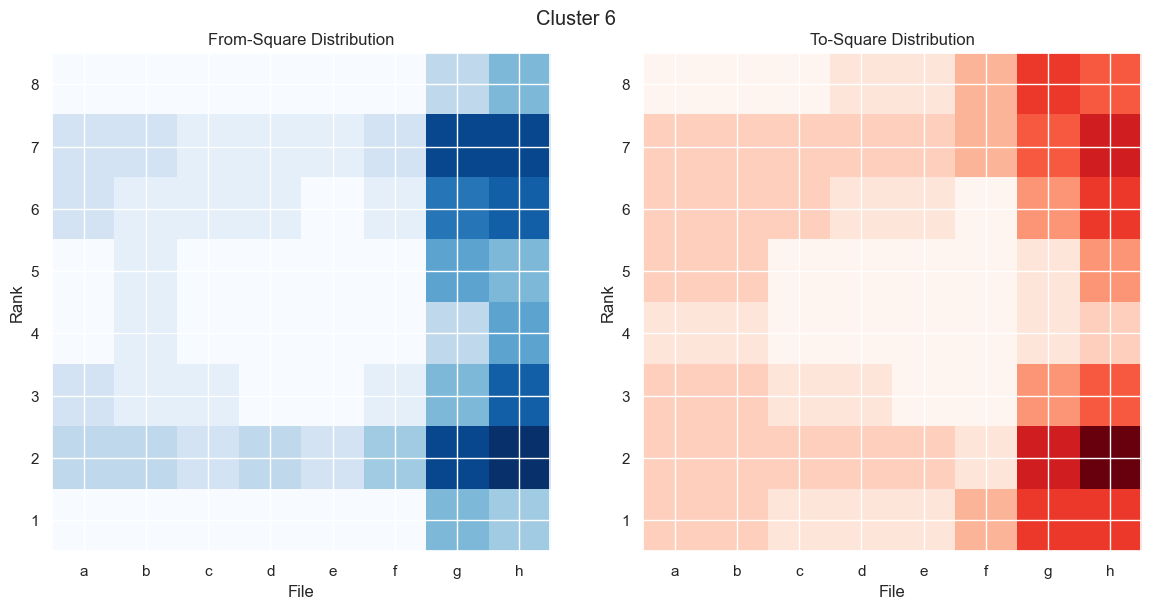

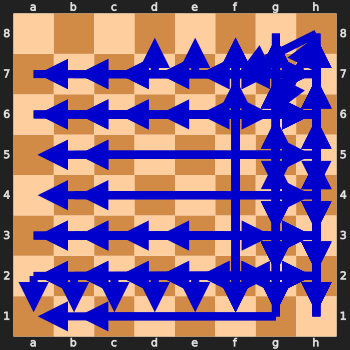

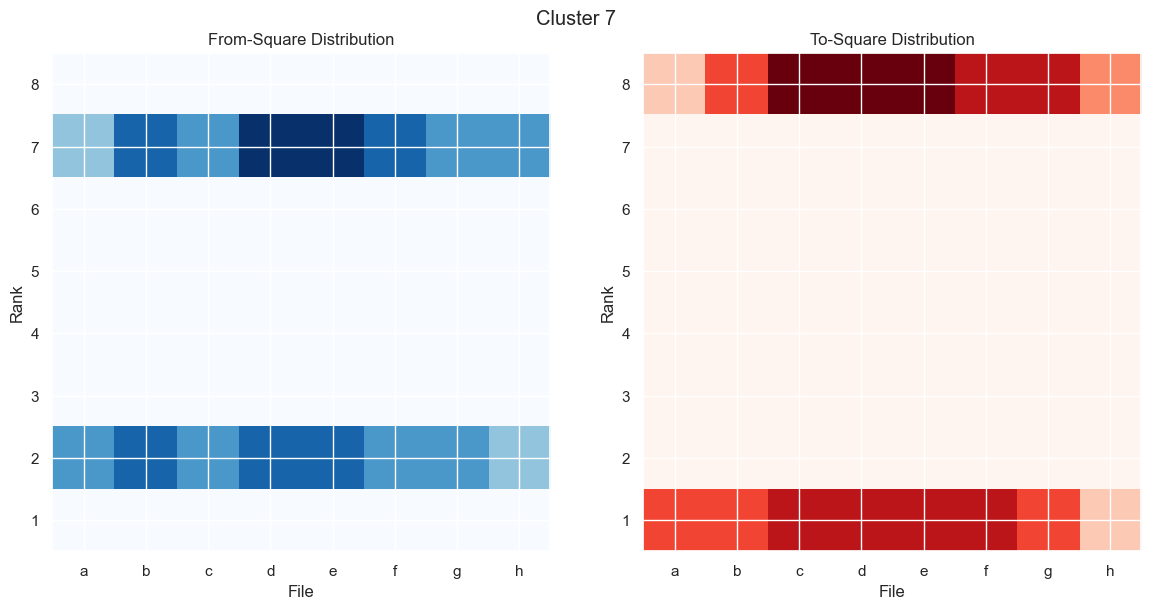

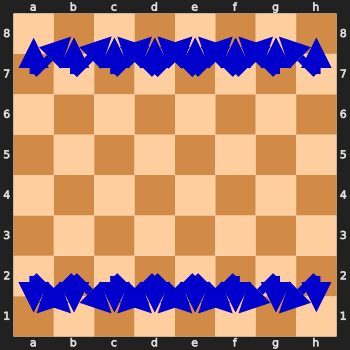

In [27]:
maxCluster = np.max(clusters)
for i in range(maxCluster + 1):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

Number of clusters found: 1
Percentage of noise points: 0.0


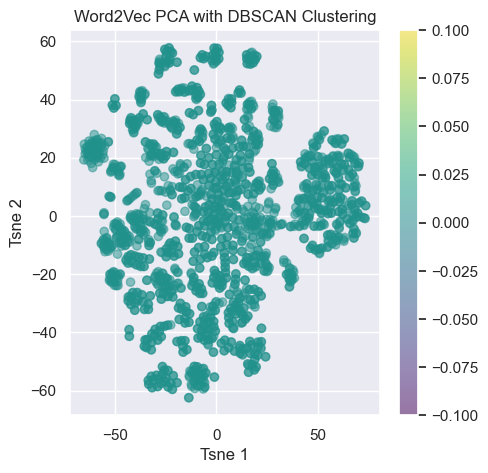

In [83]:
#DBscan clustering using cosine distance
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4,min_samples=1500)

dbscan.fit(wordVectors)
clusters = dbscan.labels_
maxCluster = np.max(clusters)

#Print the number of clusters found
print(f'Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}')
print(f'Percentage of noise points: {list(clusters).count(-1)/len(clusters)}')

#Print number of 

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with DBSCAN Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()


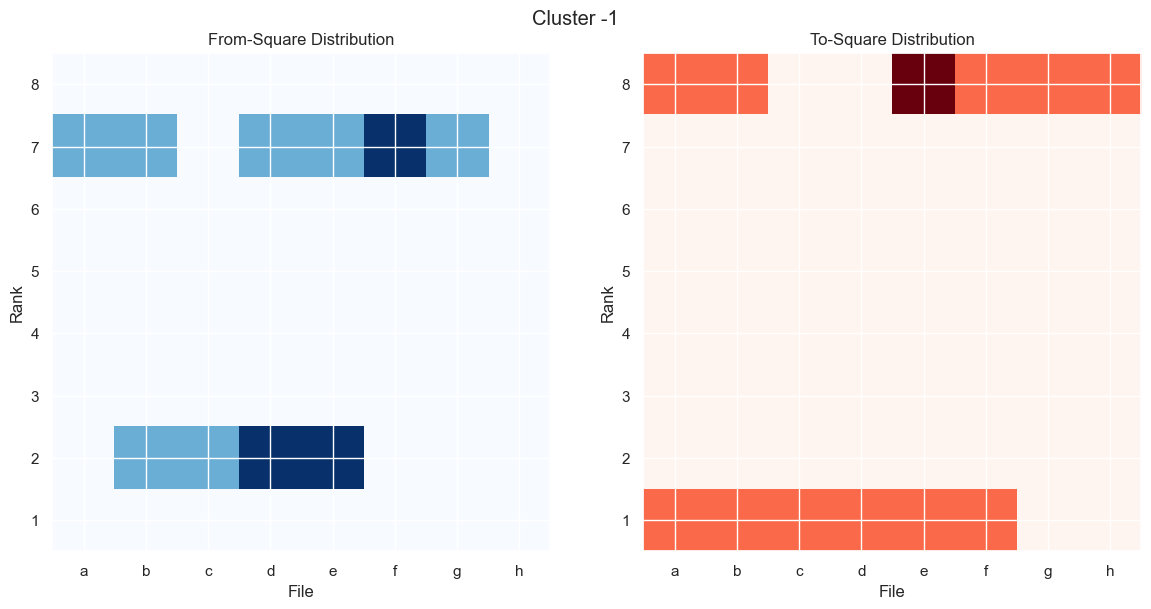

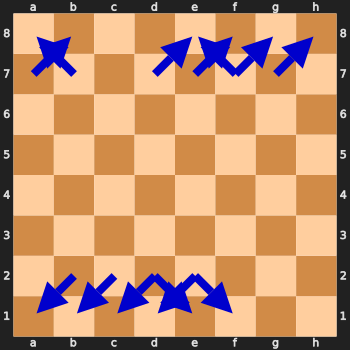

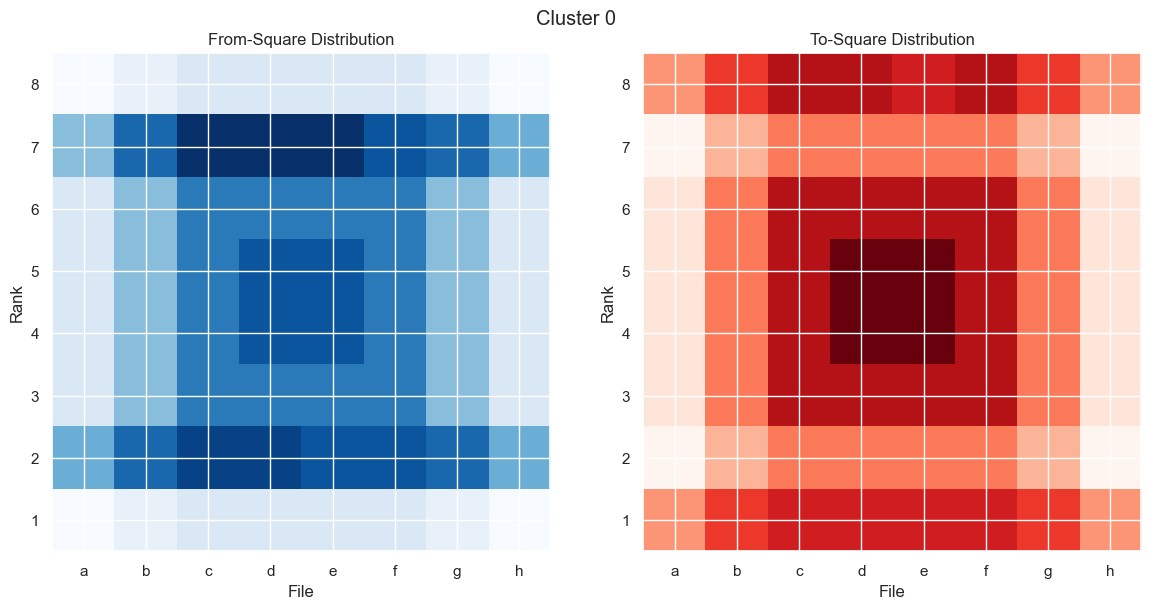

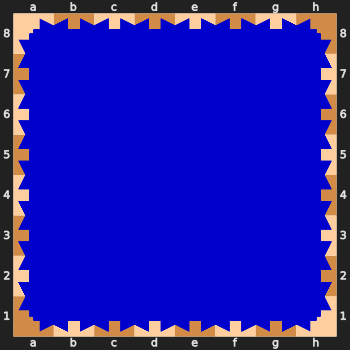

In [29]:
#Plot the clusters using the move plotter
for i in range(-1, maxCluster + 1):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

For n_clusters = 2, the silhouette score is: 0.2345
For n_clusters = 3, the silhouette score is: 0.1679
For n_clusters = 4, the silhouette score is: 0.1251
For n_clusters = 5, the silhouette score is: 0.1255
For n_clusters = 6, the silhouette score is: 0.0698
For n_clusters = 7, the silhouette score is: 0.0867
For n_clusters = 8, the silhouette score is: 0.0690
For n_clusters = 9, the silhouette score is: 0.0575
For n_clusters = 10, the silhouette score is: 0.0633
For n_clusters = 11, the silhouette score is: 0.0454
For n_clusters = 12, the silhouette score is: 0.0459
For n_clusters = 13, the silhouette score is: 0.0505
For n_clusters = 14, the silhouette score is: 0.0501
For n_clusters = 15, the silhouette score is: 0.0519
For n_clusters = 16, the silhouette score is: 0.0438
For n_clusters = 17, the silhouette score is: 0.0439
For n_clusters = 18, the silhouette score is: 0.0445
For n_clusters = 19, the silhouette score is: 0.0315
For n_clusters = 20, the silhouette score is: 0.0346
F

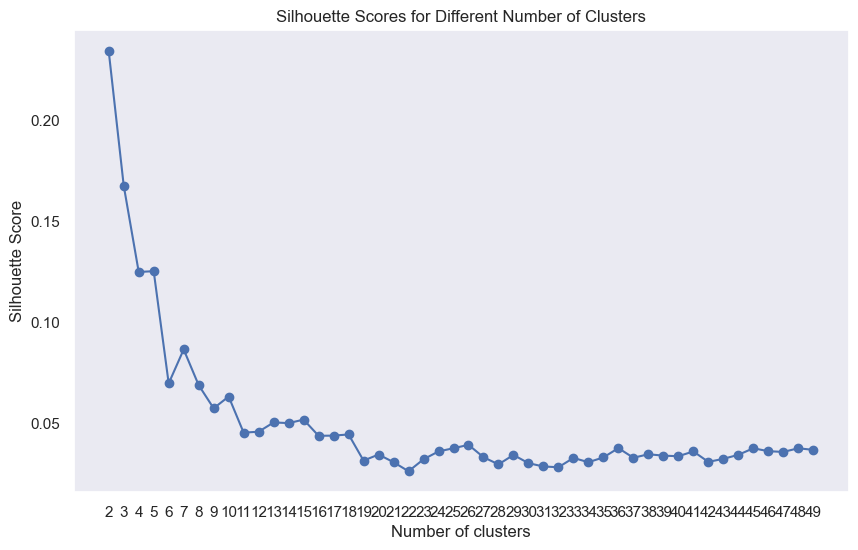

In [30]:
#Cluster with Kmean with elbow method with cosine distance

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

# Compute the cosine distance matrix
cosine_distance_matrix = pairwise_distances(wordVectors, metric='cosine')
# Compute the silhouette scores for different values of k
silhouette_scores = []
range_n_clusters = range(2, 50)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(cosine_distance_matrix)
    silhouette_avg = silhouette_score(cosine_distance_matrix, cluster_labels, metric='precomputed')
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

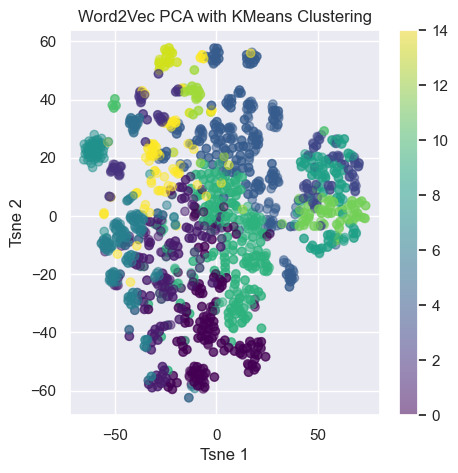

In [84]:
best_n_clusters = 15
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(wordVectors)
clusters = kmeans.labels_

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with KMeans Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

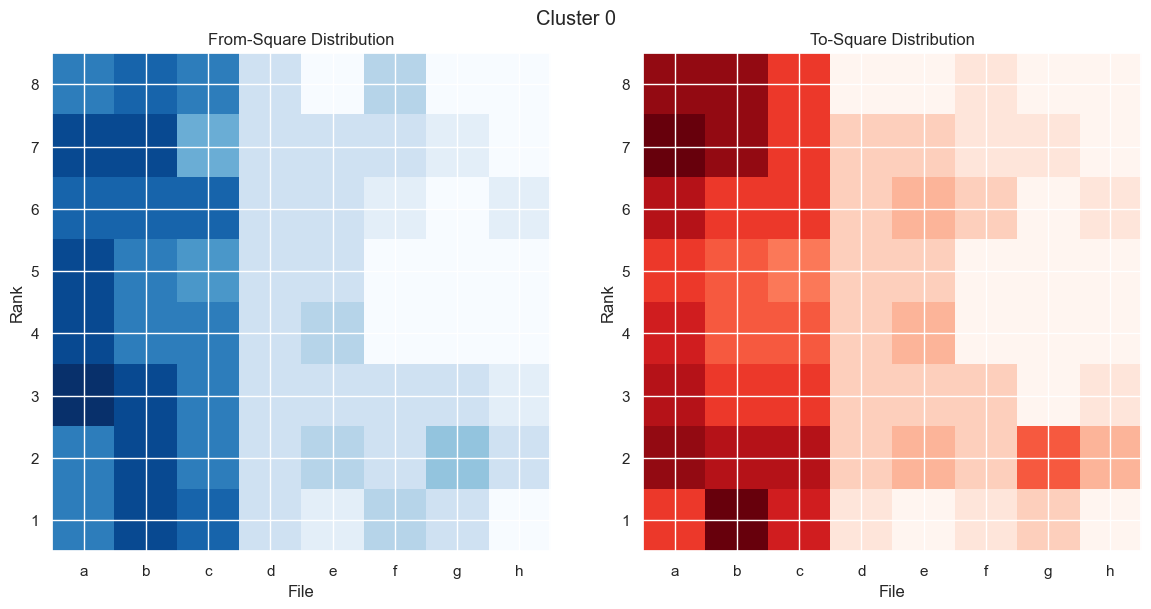

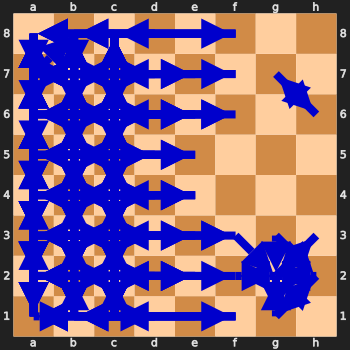

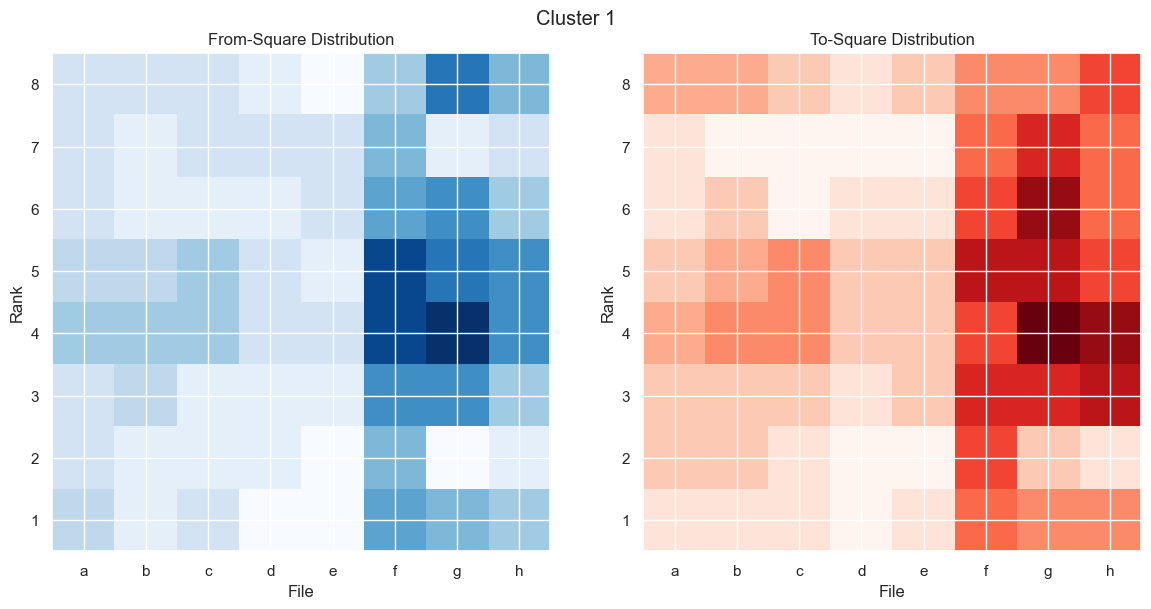

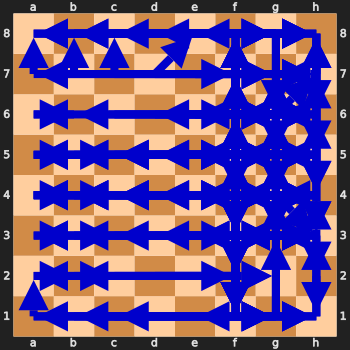

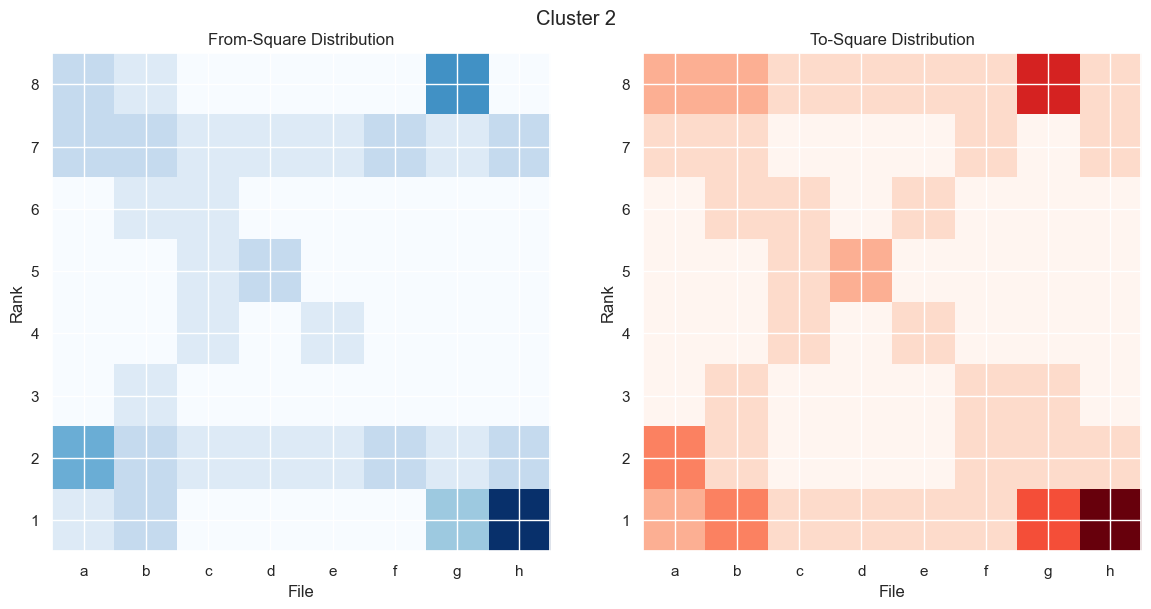

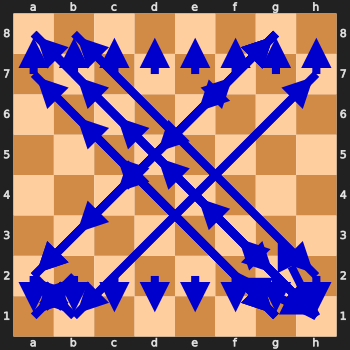

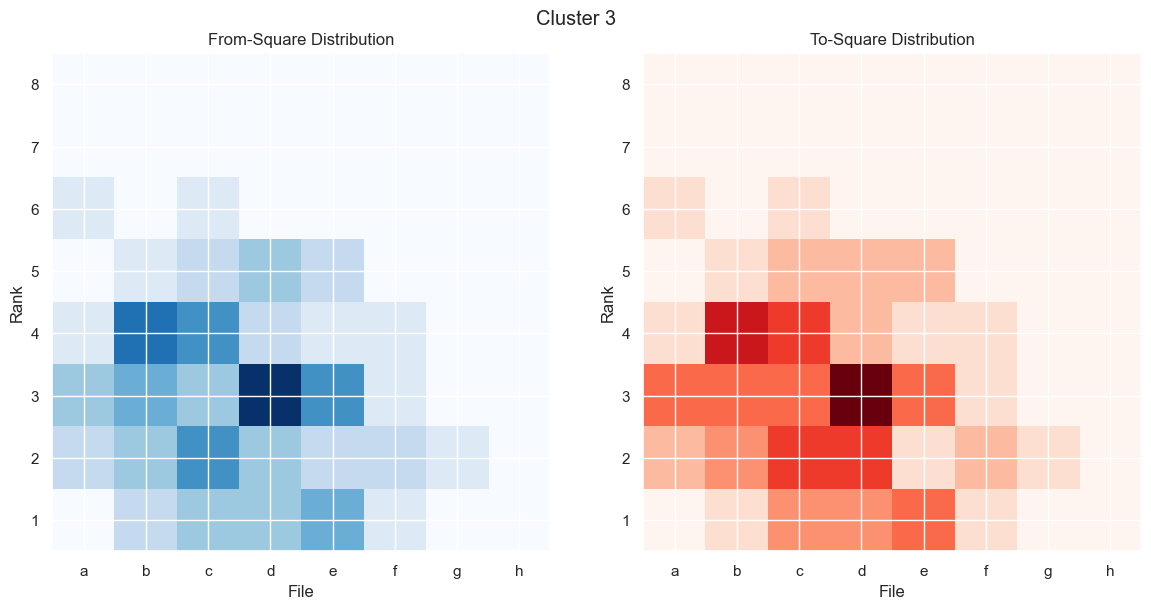

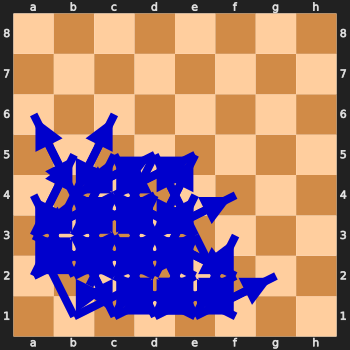

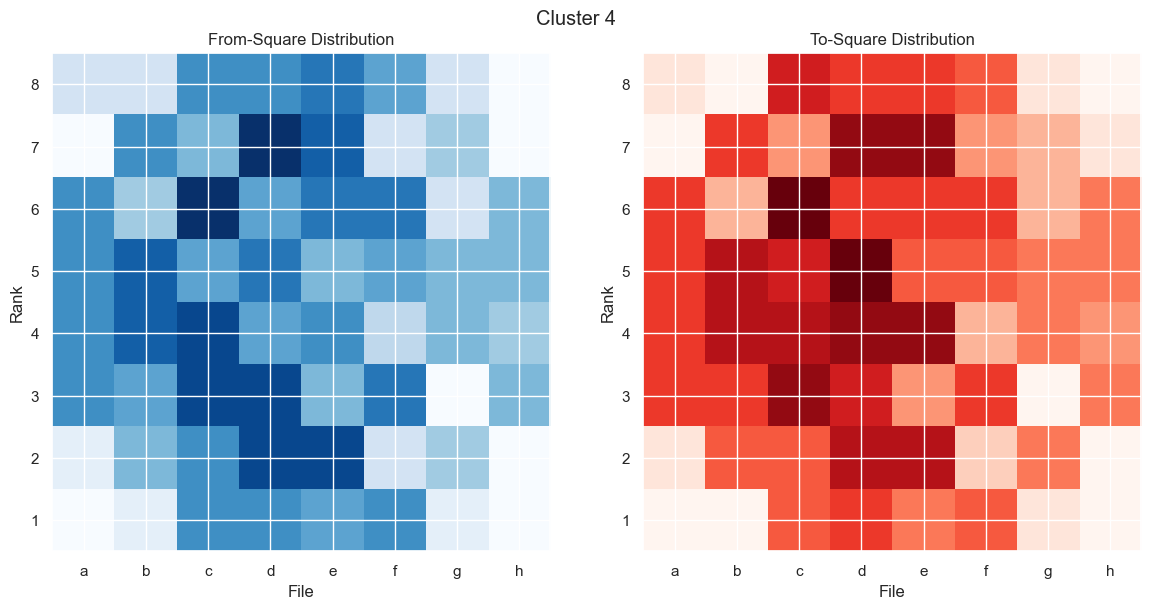

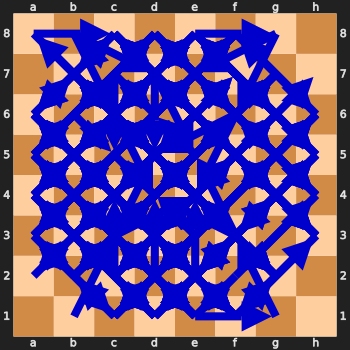

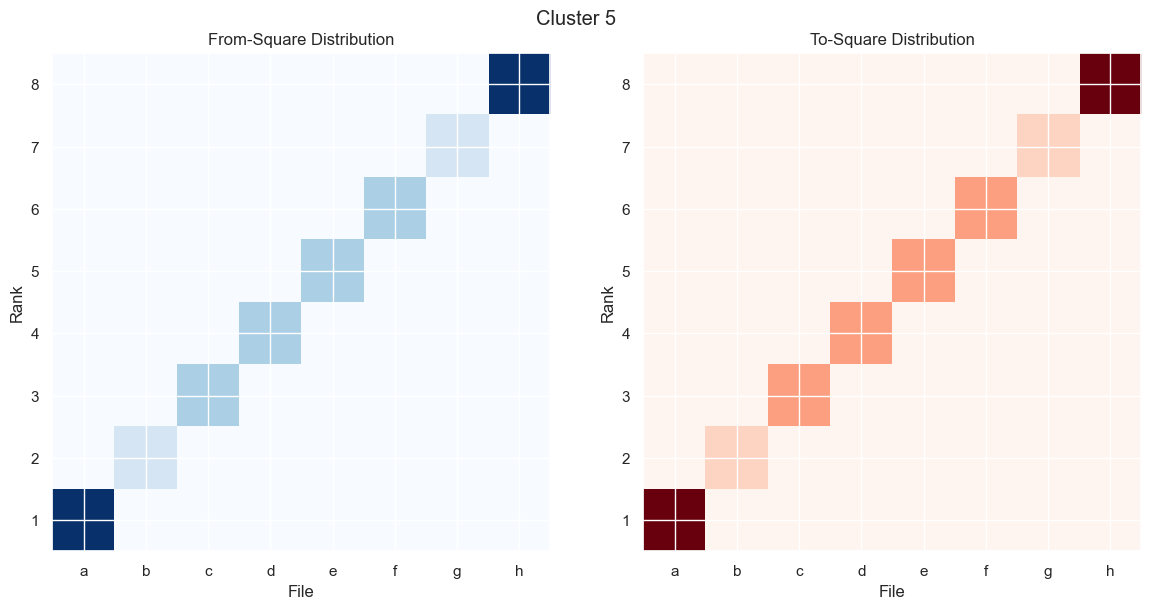

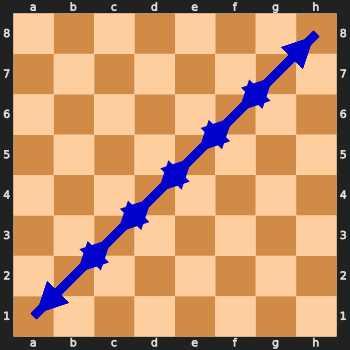

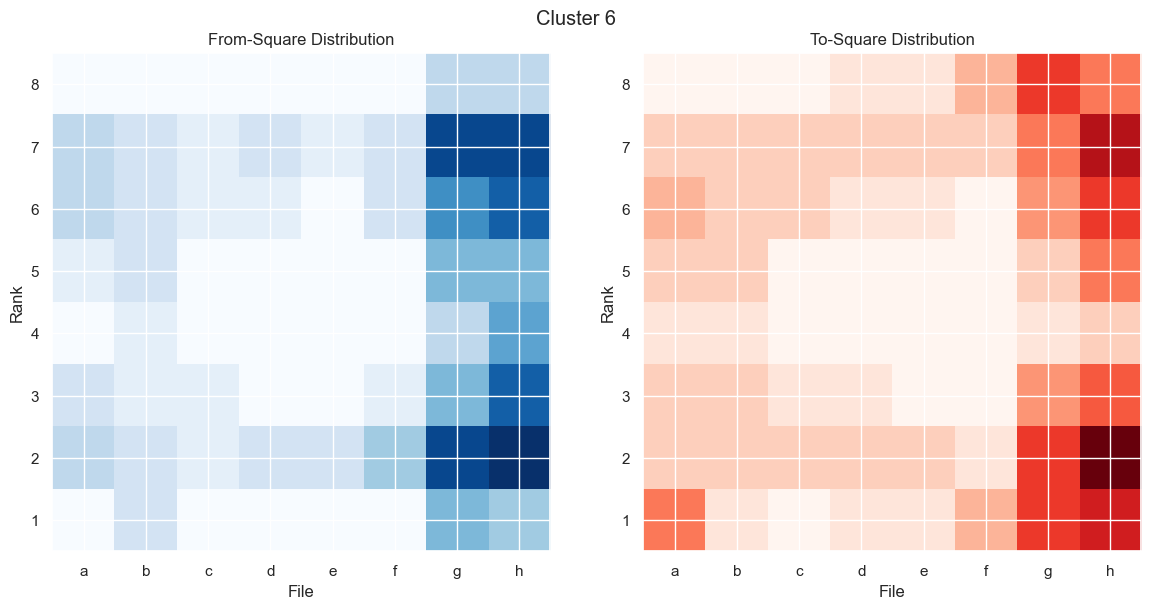

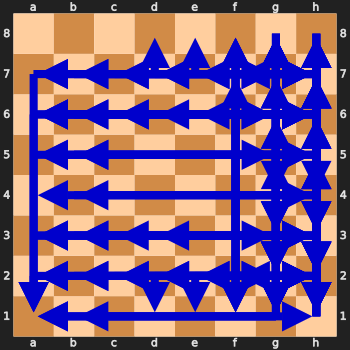

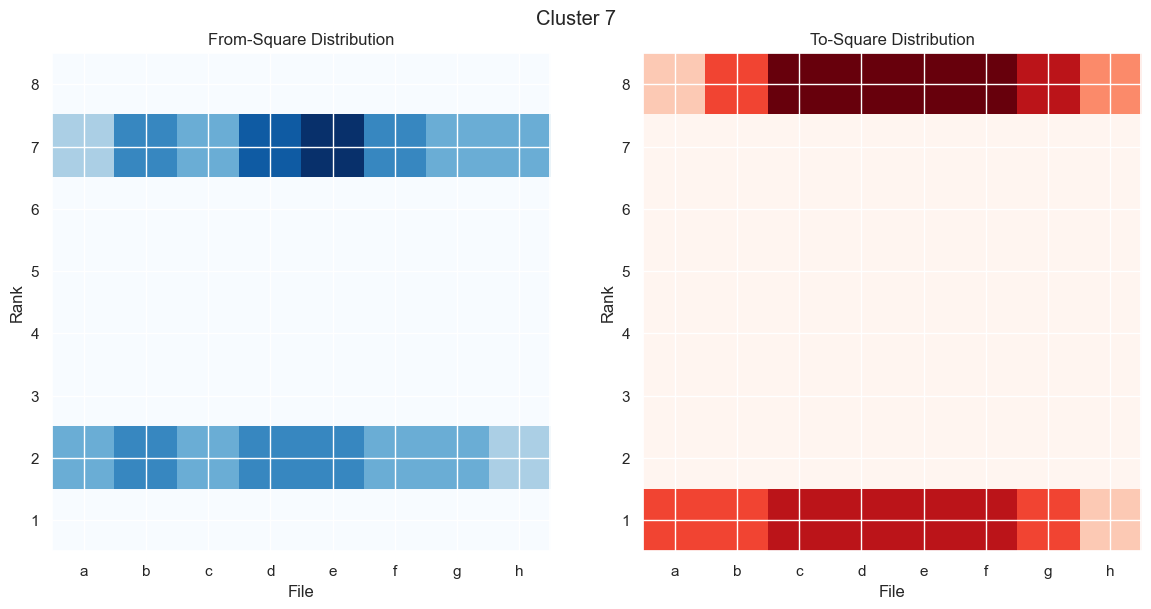

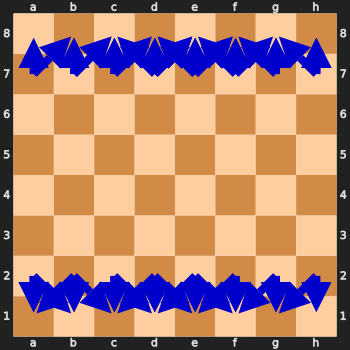

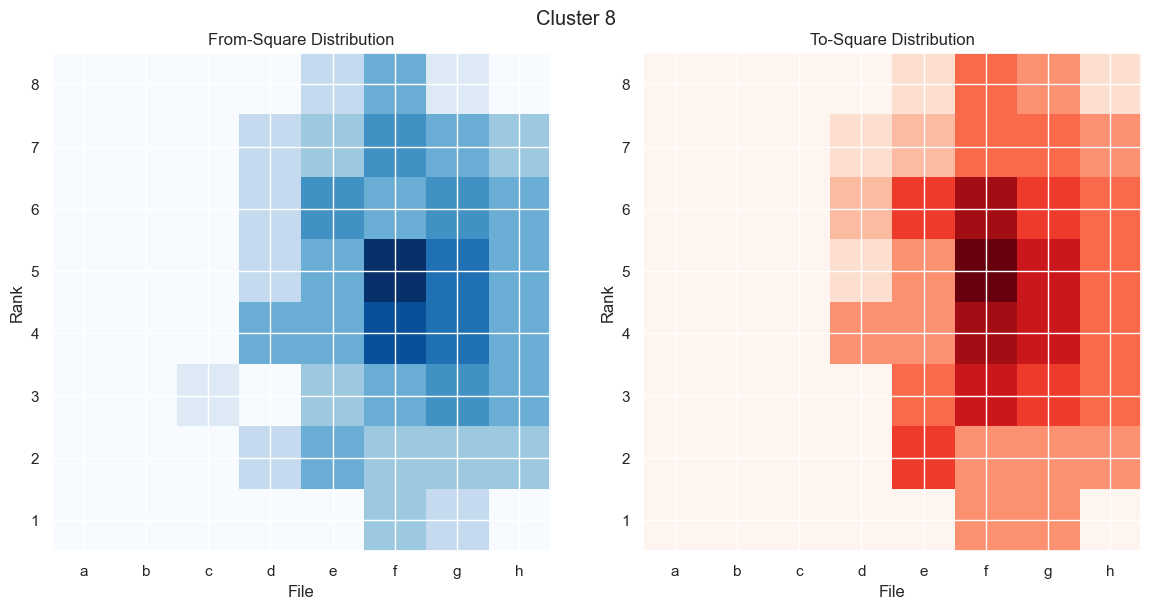

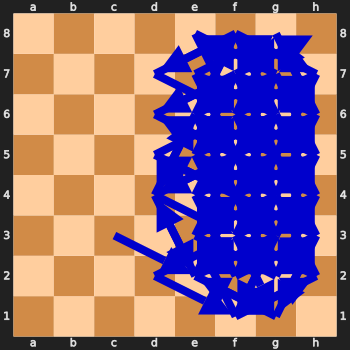

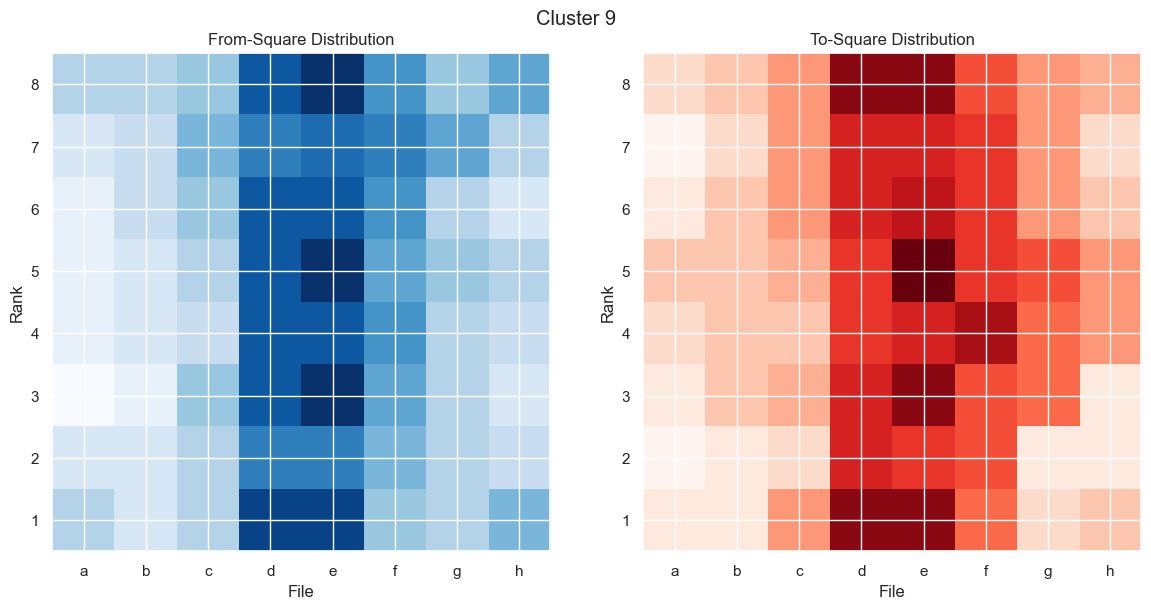

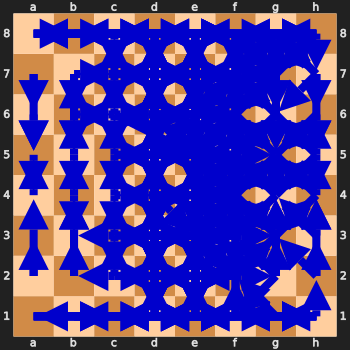

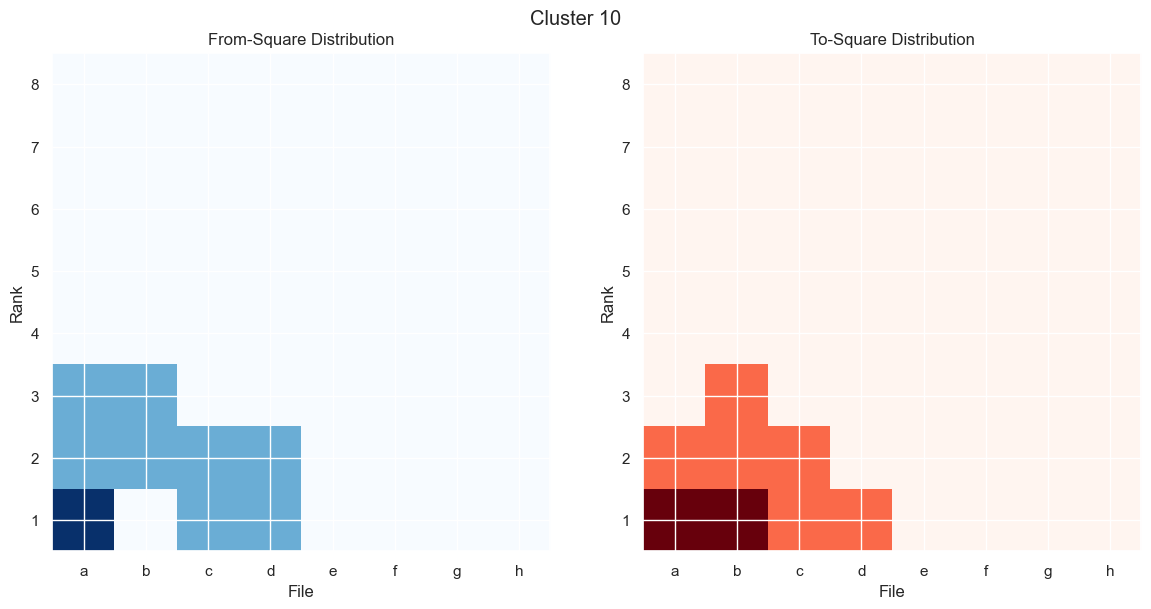

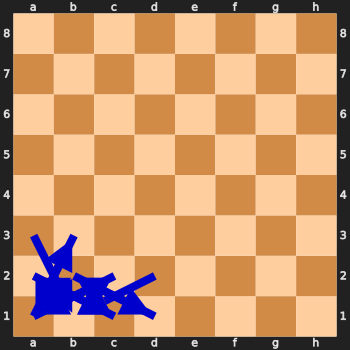

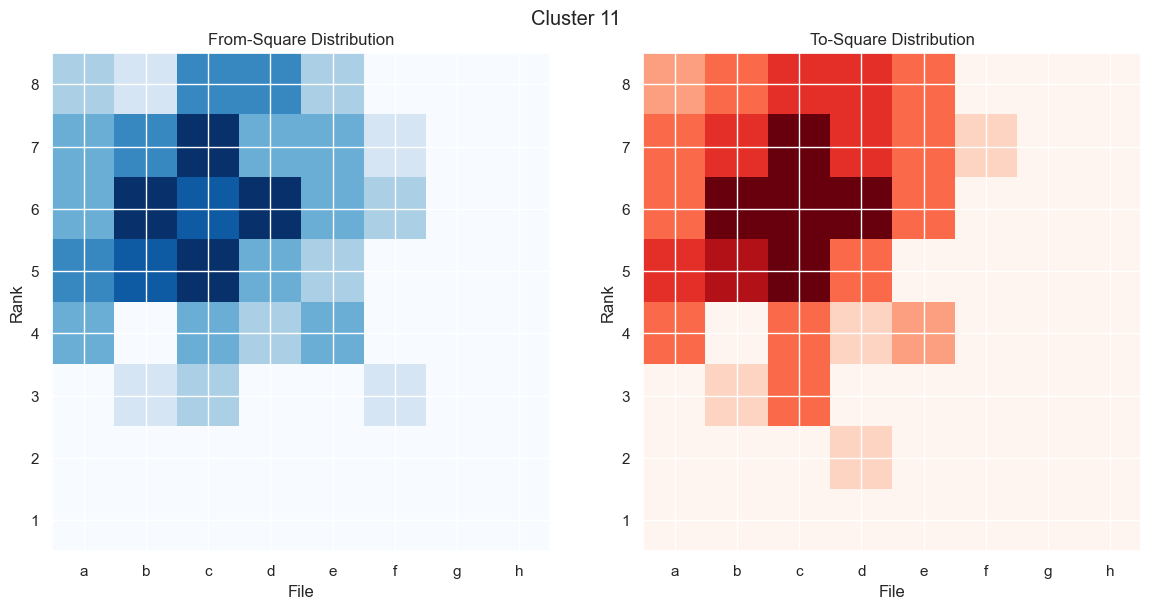

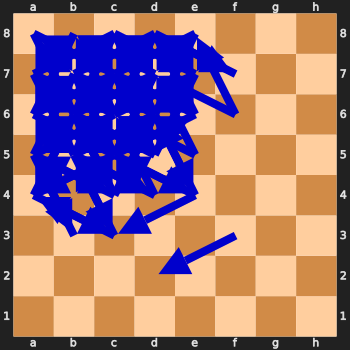

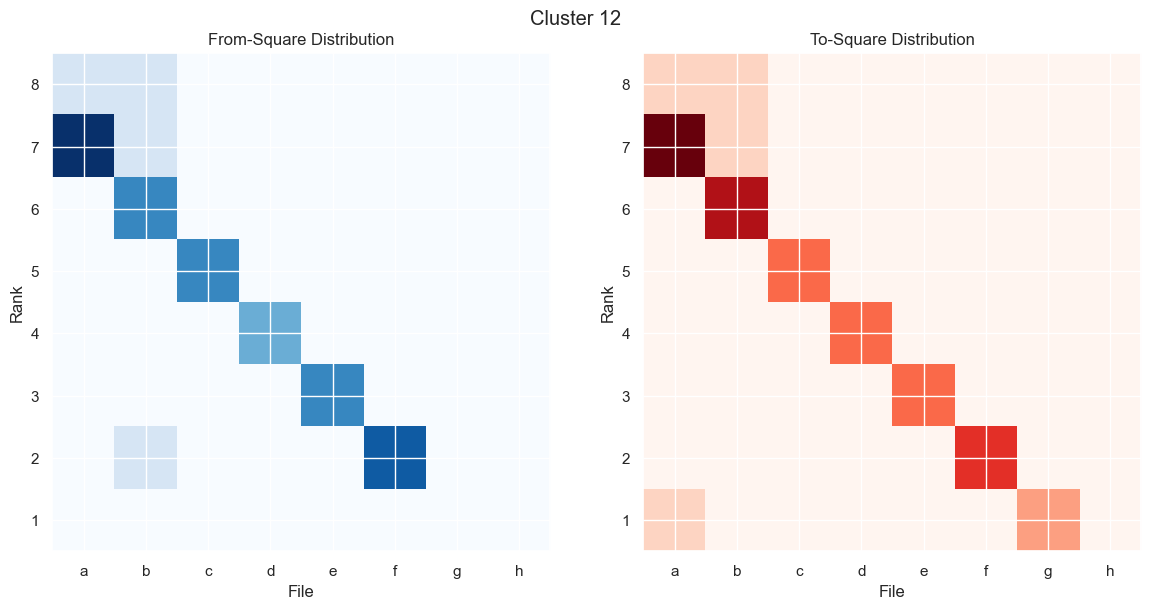

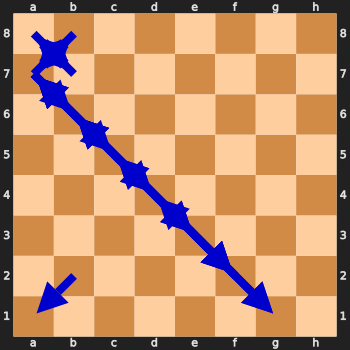

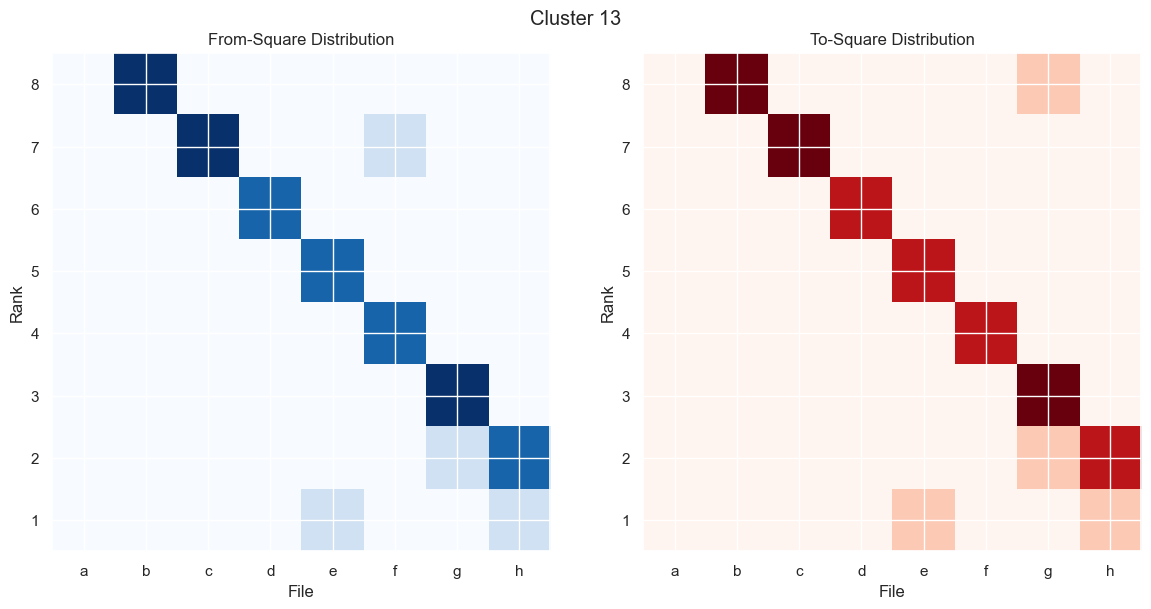

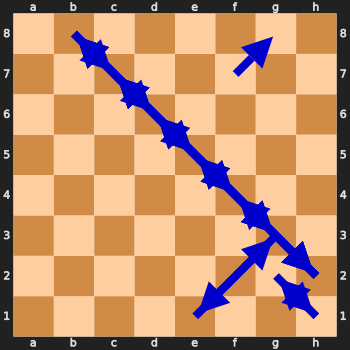

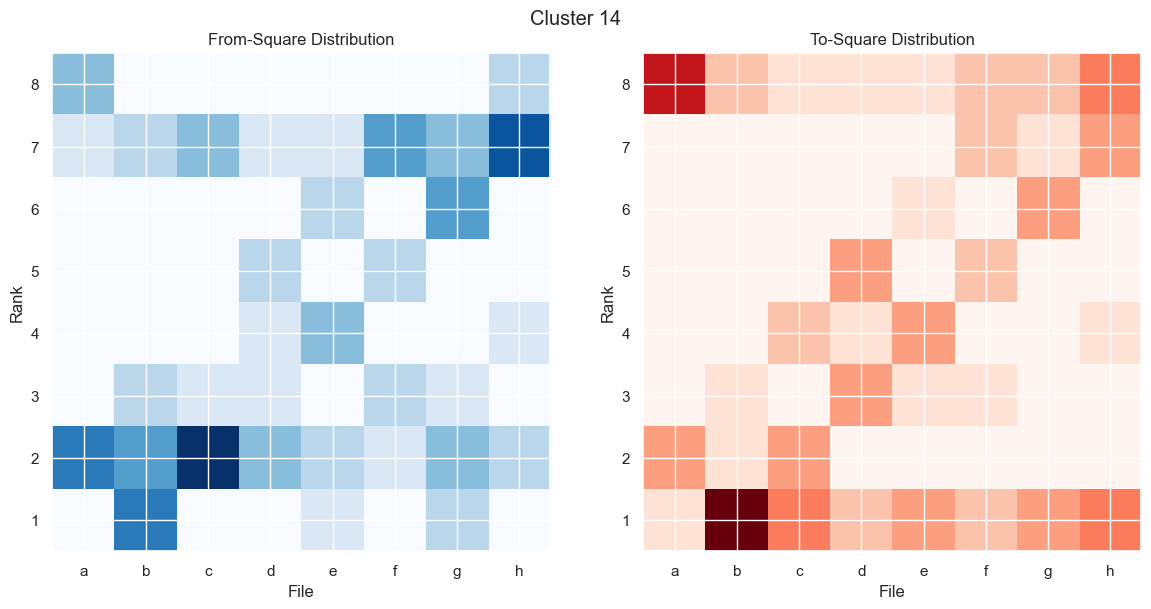

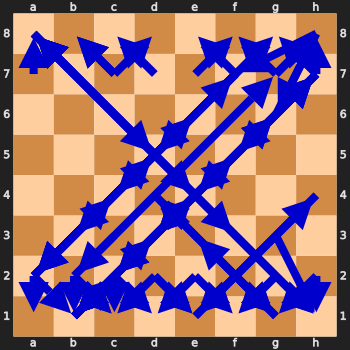

In [85]:
#plot the clusters using the move plotter
for i in range(best_n_clusters):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()